# Import stuff

In [1]:
# import our algorithms
from all_functions_corrected import *

# INSIDE THIS MODULE WE SET THE FOLLOWING GLOBAL VARIABLES
# t=180 # time to run
# sw=1 # step width
# tau = 50 # diameter of the nuclear norm ball
# D = tau 
# L = 1 # Lipshitz constant
# G = 1

# Fashion MNIST

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divided in test and training

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
X_train_full_vector =  X_train_full.reshape(X_train_full.shape[0], 784) #28*28 

X_train_full_vector.shape

(60000, 784)

In [5]:
data = X_train_full_vector.T

data.shape

(784, 60000)

In [6]:
features = data
classes = y_train_full
classes = classes.astype(int)

# modify the global variables N, M, H inside the imported module
set_global_dimentions(N_new = features.shape[1],M_new = features.shape[0], H_new = len(np.unique(classes)))
from all_functions_corrected import N, M, H
print("M (n. of features): {}, N (n. of samples): {}, H (n. of classes): {}".format(M, N, H))

M (n. of features): 784, N (n. of samples): 60000, H (n. of classes): 10


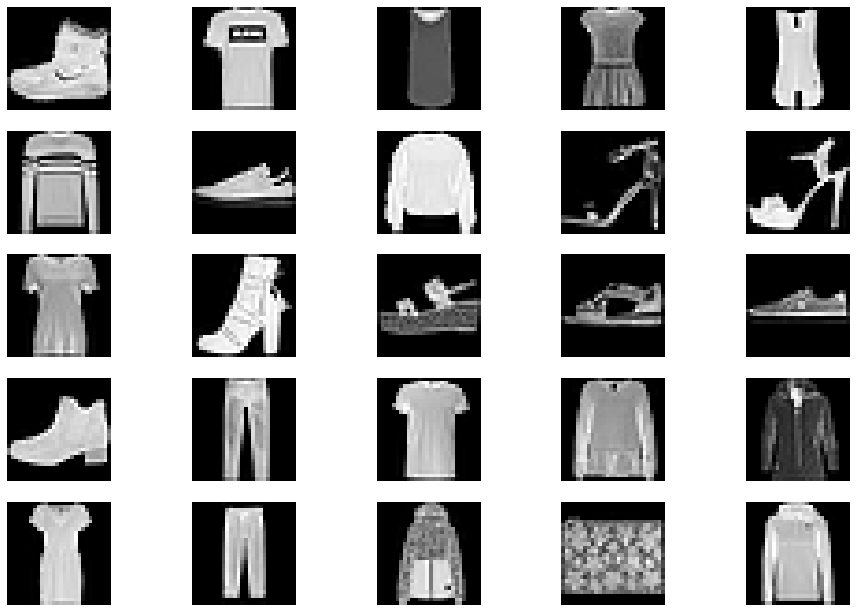

In [7]:
# some visualization
n = 5

fig, axes = plt.subplots(n,n, figsize=(16,11))
index = 0
for i in range(n):
    for j in range(n):
        test= features[:,index]
        test = np.reshape(test, (28,28))
        axes[i,j].axis('off')
        axes[i,j].grid(b=None)
        _ = axes[i,j].imshow(test, cmap='gray')
        index+=1
    

In [8]:
#initialize initial weights as a sparse matrix. 
np.random.seed(3)
weights_initial = scipy.sparse.random(H, features.shape[0], density=0.0009).A
print("Nuclear norm of initial weights: {}".format(np.linalg.norm(weights_initial, ord='nuc')))
print("Initial loss: {}".format(loss_function(weights_initial, features, classes)))

Nuclear norm of initial weights: 2.481220389833031
Initial loss: 61.4736306886368


## FW

In [9]:
loss_fw, time_fw, weights_fw = fw(W = weights_initial, X = features, y = classes, lr = 0.0001, maxit = 1000, step_width=sw, time_to_run=t)

Iteration: 1;  Time Elapsed: 0;  Loss: 61.4736306886368
Iteration: 1;  Time Elapsed: 7.239417791366577;  Loss: 53.833464712061364
Iteration: 2;  Time Elapsed: 12.999539136886597;  Loss: 46.42931107846293
Iteration: 3;  Time Elapsed: 19.464452743530273;  Loss: 39.245182107504
Iteration: 4;  Time Elapsed: 26.87781858444214;  Loss: 32.337297335309806
Iteration: 5;  Time Elapsed: 34.08583974838257;  Loss: 25.796846454438075
Iteration: 6;  Time Elapsed: 40.34743523597717;  Loss: 19.785342569501065
Iteration: 7;  Time Elapsed: 47.54055190086365;  Loss: 14.67272835606217
Iteration: 8;  Time Elapsed: 53.968644857406616;  Loss: 11.083400527248005
Iteration: 9;  Time Elapsed: 60.66772508621216;  Loss: 9.036463186959656
Iteration: 10;  Time Elapsed: 66.75303244590759;  Loss: 8.056543740886621
Iteration: 11;  Time Elapsed: 72.8237566947937;  Loss: 7.567253809792197
Iteration: 12;  Time Elapsed: 79.40745210647583;  Loss: 7.345708116038067
Iteration: 13;  Time Elapsed: 85.63081336021423;  Loss: 7.20

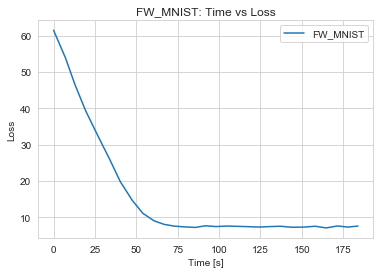

In [10]:
plot('fw_mnist', loss_fw, time_fw)

In [11]:
loss_function(weights_fw, features, classes)

7.583768138690518

In [12]:
#does the minimum point respect the bound on the domain? 
print(np.linalg.norm(weights_fw, ord = 'nuc'))

2.5349507862484155


## SFW

In [13]:
loss_sfw, time_sfw, weigths_sfw = sfw(W=weights_initial.copy(), X=features, y=classes, lr=0.0001, maxit=1000, step_width=sw, time_to_run=t)

Iteration: 1;  Time Elapsed: 0;  Loss: 61.4736306886368
Iteration: 1;  Time Elapsed: 2.3775365352630615;  Loss: 59.71354571388424
Iteration: 2;  Time Elapsed: 3.5567712783813477;  Loss: 52.948248917328854
Iteration: 3;  Time Elapsed: 4.717905759811401;  Loss: 45.648848039997134
Iteration: 4;  Time Elapsed: 5.835623264312744;  Loss: 38.57511707531849
Iteration: 5;  Time Elapsed: 7.008474588394165;  Loss: 31.709325289801324
Iteration: 6;  Time Elapsed: 8.16333556175232;  Loss: 25.18291486805144
Iteration: 7;  Time Elapsed: 9.327456951141357;  Loss: 19.194189074417963
Iteration: 8;  Time Elapsed: 10.459648609161377;  Loss: 14.618824533063787
Iteration: 9;  Time Elapsed: 11.677731037139893;  Loss: 11.375459270018467
Iteration: 10;  Time Elapsed: 12.907466888427734;  Loss: 9.40895384954633
Iteration: 11;  Time Elapsed: 14.121461391448975;  Loss: 8.200673047445138
Iteration: 12;  Time Elapsed: 15.326495885848999;  Loss: 8.204162741252617
Iteration: 13;  Time Elapsed: 16.526883840560913;  Los

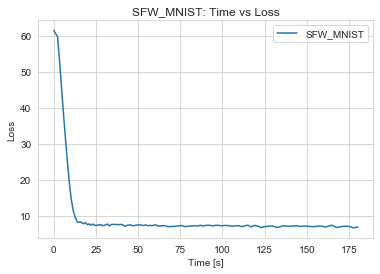

In [14]:
plot('sfw_mnist', loss_sfw, time_sfw)

In [15]:
#does the minimum point respect the bound on the domain?
print(np.linalg.norm(weigths_sfw, ord = 'nuc'))

2.776431806458888


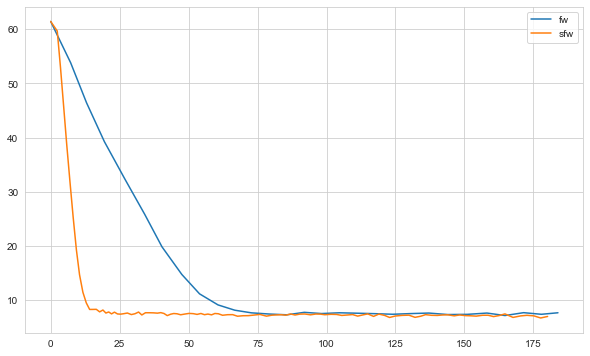

In [16]:
plt.figure(figsize=(10,6))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.legend()
plt.show()

## SVRF

In [17]:
loss_svrf, time_svrf, weights_svrf = svrf(W = weights_initial.copy(), X= features, y=  classes, epochs=10, time_to_run=t, step_width = sw, lr=0.0001)

Iteration: 1;  Time Elapsed: 0;  Loss: 61.4736306886368
Iteration: 1;  Time Elapsed: 8.056686162948608;  Loss: 53.833464712061364
Iteration: 2;  Time Elapsed: 9.230602264404297;  Loss: 46.408953284848735
Iteration: 3;  Time Elapsed: 10.47407579421997;  Loss: 39.16965822239616
Iteration: 4;  Time Elapsed: 11.693560600280762;  Loss: 33.24418380383282
Iteration: 5;  Time Elapsed: 13.37875747680664;  Loss: 26.419542773926988
Iteration: 6;  Time Elapsed: 15.173411130905151;  Loss: 20.61653362356142
Iteration: 7;  Time Elapsed: 16.83773422241211;  Loss: 15.452309319344971
Iteration: 8;  Time Elapsed: 18.187209367752075;  Loss: 15.40184233789654
Iteration: 9;  Time Elapsed: 19.36736750602722;  Loss: 10.984943684928666
Iteration: 10;  Time Elapsed: 20.508761405944824;  Loss: 9.17301513308974
Iteration: 11;  Time Elapsed: 21.555468320846558;  Loss: 7.837412544097443
Iteration: 12;  Time Elapsed: 22.62400531768799;  Loss: 7.205571630523136
Iteration: 13;  Time Elapsed: 23.79531455039978;  Loss: 

Iteration: 111;  Time Elapsed: 160.39328384399414;  Loss: 7.185668775308832
Iteration: 112;  Time Elapsed: 162.80175113677979;  Loss: 7.537615676347769
Iteration: 113;  Time Elapsed: 164.98416423797607;  Loss: 7.612668869820765
Iteration: 114;  Time Elapsed: 167.1882927417755;  Loss: 7.375932274347995
Iteration: 115;  Time Elapsed: 169.1402473449707;  Loss: 7.134730061439695
Iteration: 116;  Time Elapsed: 170.84025502204895;  Loss: 7.155253696849473
Iteration: 117;  Time Elapsed: 172.51432609558105;  Loss: 7.447813498361507
Iteration: 118;  Time Elapsed: 173.87119674682617;  Loss: 7.006050263533499
Iteration: 119;  Time Elapsed: 175.2340886592865;  Loss: 7.205897178939272
Iteration: 120;  Time Elapsed: 176.6433186531067;  Loss: 7.06387425183603
Iteration: 121;  Time Elapsed: 178.05376553535461;  Loss: 7.668185027166843
Iteration: 122;  Time Elapsed: 179.4719660282135;  Loss: 7.012416631745002
Iteration: 123;  Time Elapsed: 180.86242508888245;  Loss: 6.878913983331173


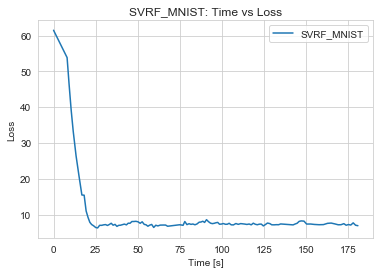

In [18]:
plot('svrf_mnist', loss_svrf, time_svrf)

In [19]:
#does the minimum point respect the bound on the domain?
print(np.linalg.norm(weights_svrf, ord = 'nuc'))

2.792653511215993


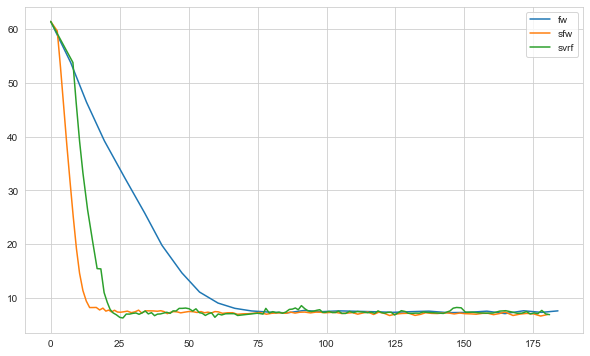

In [20]:
plt.figure(figsize=(10,6))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.plot(time_svrf, loss_svrf, label='svrf')
plt.legend()
plt.show()

## SCGS

In [21]:
info_fwg, loss_scgs, time_scgs, weights_scgs = scgs(W = weights_initial.copy(), X= features, y = classes, maxit = 1000, 
                                                    step_width=sw, time_to_run=t, lr=0.0001, lr_fwg=0.05)

Iteration: 1;  Time Elapsed: 0;  Loss: 61.4736306886368
Iteration: 1;  Time Elapsed: 5.127356052398682;  Loss: 57.982717670940524
Iteration: 2;  Time Elapsed: 9.136608362197876;  Loss: 51.02801090678643
Iteration: 3;  Time Elapsed: 14.167784452438354;  Loss: 43.69409300968043
Iteration: 4;  Time Elapsed: 19.411568880081177;  Loss: 36.75211431237581
Iteration: 5;  Time Elapsed: 24.884705066680908;  Loss: 29.68912960687237
Iteration: 6;  Time Elapsed: 30.290205717086792;  Loss: 23.314514692756198
Iteration: 7;  Time Elapsed: 35.15332221984863;  Loss: 17.527498652560368
Iteration: 8;  Time Elapsed: 39.32471418380737;  Loss: 13.185201209060164
Iteration: 9;  Time Elapsed: 44.80438280105591;  Loss: 10.915328746431797
Iteration: 10;  Time Elapsed: 49.46526908874512;  Loss: 9.758212370572089
Iteration: 11;  Time Elapsed: 54.27543616294861;  Loss: 9.642774241790226
Iteration: 12;  Time Elapsed: 59.55281686782837;  Loss: 9.32141199775516
Iteration: 13;  Time Elapsed: 65.73329401016235;  Loss: 9

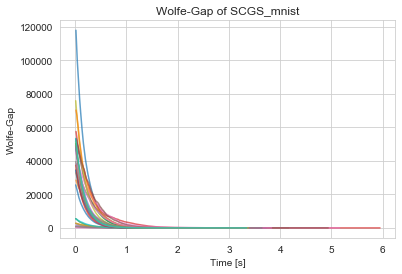

In [22]:
plot_wg("SCGS_mnist",info_fwg,1)

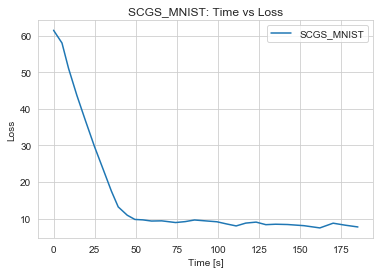

In [23]:
plot('scgs_mnist', loss_scgs, time_scgs)

In [24]:
#does the minimum point respect the bound on the domain? 
np.linalg.norm(weights_scgs, ord='nuc')

2.528189049754511

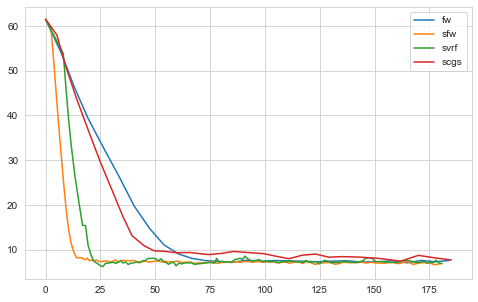

In [25]:
plt.figure(figsize=(8,5))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.plot(time_svrf, loss_svrf, label='svrf')
plt.plot(time_scgs, loss_scgs, label='scgs')
plt.legend()
plt.show()

## STORC

In [26]:
info_fwg, loss_storc, time_storc, weights_storc = storc(W = weights_initial.copy(), X= features, y=classes, epochs=10,  
                                         step_width=sw, time_to_run=t, lr=0.00015, lr_fwg=0.05)

Iteration: 1;  Time Elapsed: 0;  Loss: 61.4736306886368
Iteration: 1;  Time Elapsed: 12.510513067245483;  Loss: 50.09002999569259
Iteration: 2;  Time Elapsed: 15.46627926826477;  Loss: 39.258344336523635
Iteration: 3;  Time Elapsed: 18.109781980514526;  Loss: 29.143129396002962
Iteration: 4;  Time Elapsed: 21.256524801254272;  Loss: 20.319640453549642
Iteration: 5;  Time Elapsed: 24.377408266067505;  Loss: 13.546555107315948
Iteration: 6;  Time Elapsed: 27.706663846969604;  Loss: 11.549420229634114
Iteration: 7;  Time Elapsed: 30.855826377868652;  Loss: 11.023556084317041
Iteration: 8;  Time Elapsed: 34.01142382621765;  Loss: 10.788879097627275
Iteration: 9;  Time Elapsed: 37.18804430961609;  Loss: 10.946408254116267
Iteration: 10;  Time Elapsed: 40.399218797683716;  Loss: 10.857225838316195
Iteration: 11;  Time Elapsed: 43.63158416748047;  Loss: 11.9565637794537
Iteration: 12;  Time Elapsed: 46.95157718658447;  Loss: 10.310809258106351
Iteration: 13;  Time Elapsed: 50.332539796829224;

In [27]:
#does the minimum point respect the bound on the domain? 
np.linalg.norm(weights_storc, ord='nuc')

2.6018035216846336

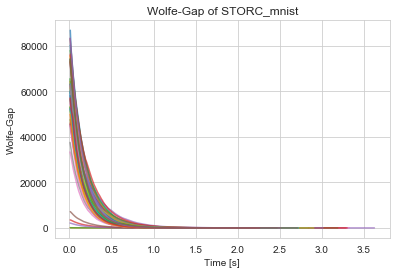

In [28]:
plot_wg("STORC_mnist",info_fwg,1)

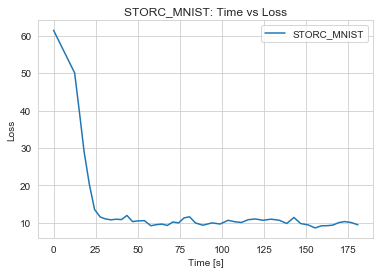

In [29]:
plot('storc_mnist', loss_storc, time_storc)

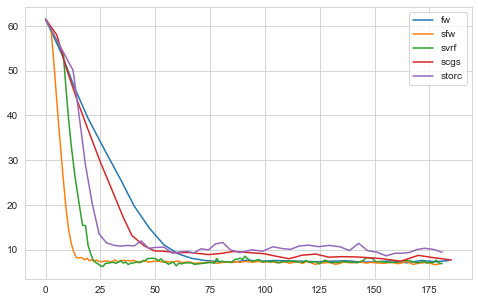

In [30]:
plt.figure(figsize=(8,5))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.plot(time_svrf, loss_svrf, label='svrf')
plt.plot(time_scgs, loss_scgs, label='scgs')
plt.plot(time_storc, loss_storc, label='storc')
plt.legend()
plt.show()

## SGM

In [31]:
loss_sgm, time_sgm, W_sgm = sgm(W = weights_initial.copy(), X = features, y = classes, lr=0.0001
                                    , step_width=sw, maxit = 1000, time_to_run=t, batch_size=100, s=0.5)

Iteration: 1;  Time Elapsed: 0;  Loss: 61.4736306886368
Iteration: 1;  Time Elapsed: 2.3758537769317627;  Loss: 53.973901672251145
Iteration: 2;  Time Elapsed: 3.510350465774536;  Loss: 46.60801460532118
Iteration: 3;  Time Elapsed: 4.5298051834106445;  Loss: 39.471991560503376
Iteration: 4;  Time Elapsed: 5.594125270843506;  Loss: 32.652228846350575
Iteration: 5;  Time Elapsed: 6.608681917190552;  Loss: 25.958073445477435
Iteration: 6;  Time Elapsed: 7.671159982681274;  Loss: 19.949338015458164
Iteration: 7;  Time Elapsed: 8.778597354888916;  Loss: 14.874240627160992
Iteration: 8;  Time Elapsed: 9.854756116867065;  Loss: 11.135184859389135
Iteration: 9;  Time Elapsed: 11.130892753601074;  Loss: 9.043738636100045
Iteration: 10;  Time Elapsed: 12.513819694519043;  Loss: 8.149778373377274
Iteration: 11;  Time Elapsed: 13.711511850357056;  Loss: 7.455393068705305
Iteration: 12;  Time Elapsed: 14.900866270065308;  Loss: 7.92043352794426
Iteration: 13;  Time Elapsed: 16.089397192001343;  Lo

Iteration: 111;  Time Elapsed: 134.509104013443;  Loss: 7.027665895013048
Iteration: 112;  Time Elapsed: 135.60094666481018;  Loss: 6.863638594990006
Iteration: 113;  Time Elapsed: 136.77823734283447;  Loss: 7.009435024797915
Iteration: 114;  Time Elapsed: 138.10004210472107;  Loss: 7.042988803367623
Iteration: 115;  Time Elapsed: 139.46070551872253;  Loss: 6.978941562382149
Iteration: 116;  Time Elapsed: 140.81505298614502;  Loss: 6.977354945037576
Iteration: 117;  Time Elapsed: 142.11430644989014;  Loss: 6.687092629436667
Iteration: 118;  Time Elapsed: 143.35230231285095;  Loss: 6.898433798399655
Iteration: 119;  Time Elapsed: 144.61389636993408;  Loss: 7.258823899392986
Iteration: 120;  Time Elapsed: 145.86598896980286;  Loss: 6.85164771509923
Iteration: 121;  Time Elapsed: 147.0853157043457;  Loss: 7.233274728609799
Iteration: 122;  Time Elapsed: 148.22426915168762;  Loss: 7.273759648885067
Iteration: 123;  Time Elapsed: 149.48669981956482;  Loss: 6.8537126108105895
Iteration: 124;

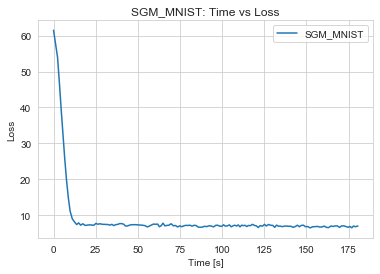

In [32]:
plot('sgm_mnist', loss_sgm, time_sgm)

In [33]:
#does the minimum point respect the bound on the domain? 
np.linalg.norm(W_sgm, ord='nuc')

2.9108829374113805

## SVRG

In [34]:
loss_svrg, time_svrg, W_svrg = svrg(W = weights_initial.copy(), X = features, y = classes, lr=0.0001,
                                    step_width=sw, maxit = 1000, time_to_run=t, batch_size=100, s=0.5, epochs=20)

Iteration: 1;  Time Elapsed: 0;  Loss: 61.4736306886368
Iteration: 1;  Time Elapsed: 8.098566055297852;  Loss: 53.833487718747605
Iteration: 2;  Time Elapsed: 9.268466234207153;  Loss: 46.435189572765275
Iteration: 3;  Time Elapsed: 10.464268207550049;  Loss: 39.23727894371134
Iteration: 4;  Time Elapsed: 11.623580694198608;  Loss: 32.30305528195062
Iteration: 5;  Time Elapsed: 12.751673460006714;  Loss: 25.809686981127673
Iteration: 6;  Time Elapsed: 13.892553091049194;  Loss: 19.84218171405091
Iteration: 7;  Time Elapsed: 15.057603359222412;  Loss: 14.814889059520118
Iteration: 8;  Time Elapsed: 16.27094078063965;  Loss: 11.124389103670476
Iteration: 9;  Time Elapsed: 17.41250991821289;  Loss: 9.490715657581676
Iteration: 10;  Time Elapsed: 18.574620723724365;  Loss: 8.132646226072877
Iteration: 11;  Time Elapsed: 19.729738473892212;  Loss: 8.489127583660132
Iteration: 12;  Time Elapsed: 20.91802453994751;  Loss: 7.527021517322307
Iteration: 13;  Time Elapsed: 22.230223417282104;  Lo

Iteration: 111;  Time Elapsed: 150.04656291007996;  Loss: 7.135729032280657
Iteration: 112;  Time Elapsed: 151.27128767967224;  Loss: 7.009407815784806
Iteration: 113;  Time Elapsed: 152.47797560691833;  Loss: 7.034157289557751
Iteration: 114;  Time Elapsed: 153.85116577148438;  Loss: 6.874425611739179
Iteration: 115;  Time Elapsed: 155.68881559371948;  Loss: 6.903060258213982
Iteration: 116;  Time Elapsed: 157.31255555152893;  Loss: 6.782526553922845
Iteration: 117;  Time Elapsed: 158.92812323570251;  Loss: 7.130044613294946
Iteration: 118;  Time Elapsed: 160.46845316886902;  Loss: 6.98012205706686
Iteration: 119;  Time Elapsed: 162.15931701660156;  Loss: 7.2735069898070615
Iteration: 120;  Time Elapsed: 163.5695676803589;  Loss: 6.672307499374223
Iteration: 121;  Time Elapsed: 164.76083397865295;  Loss: 6.808726054590431
Iteration: 122;  Time Elapsed: 165.9824013710022;  Loss: 6.6819633214559495
Iteration: 123;  Time Elapsed: 167.3213653564453;  Loss: 7.068801320820972
Iteration: 124

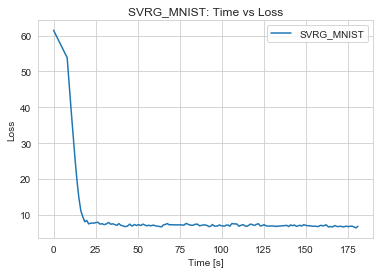

In [35]:
plot('svrg_mnist', loss_svrg, time_svrg)

In [37]:
#does the minimum point respect the bound on the domain?
np.linalg.norm(W_svrg, ord='nuc')

2.857289702415418

## Recap

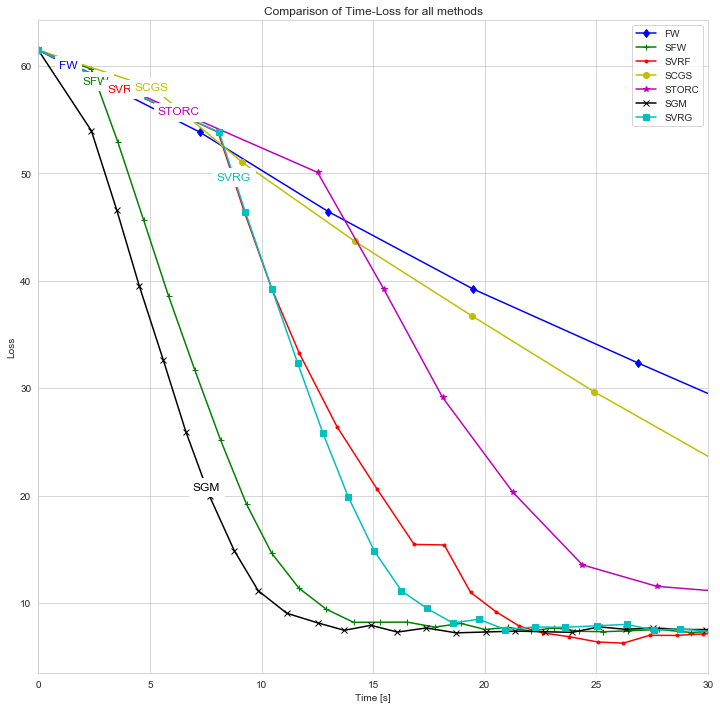

In [40]:
plot_all(['FW', 'SFW','SVRF','SCGS','STORC','SGM','SVRG'], [loss_fw, loss_sfw,loss_svrf,loss_scgs,loss_storc,loss_sgm,loss_svrg], [time_fw, time_sfw,time_svrf,time_scgs,time_storc,time_sgm,time_svrg], xlimit=(0,30), name='_MNIST')

# SVHN

Source of data: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#SVHN

For practicality reasons we only kept one color channel

In [41]:
data_svhn = pd.read_csv("data/SVHN/train.csv", sep=",", header=None)

In [42]:
data_svhn.shape

(1024, 73257)

In [44]:
data_svhn.head()
features_svhn_svhn = np.array(data_svhn)

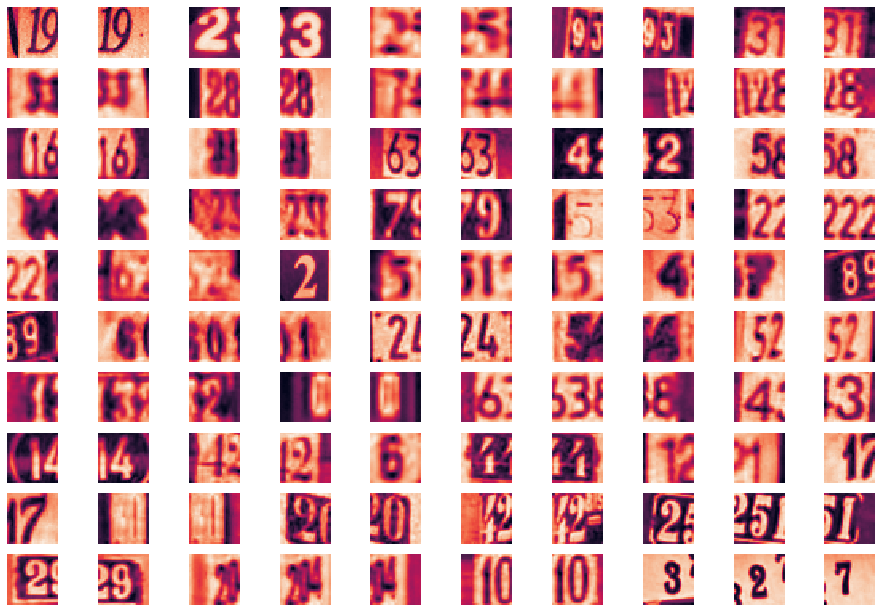

In [45]:
# some visualization
n = 10

fig, axes = plt.subplots(n,n, figsize=(16,11))
index = 0
for i in range(n):
    for j in range(n):
        test= features_svhn_svhn[:,index]
        test = np.reshape(test, (32,32))
        test = test.T #rotate the image
        axes[i,j].axis('off')
        axes[i,j].grid(b=None)
        _ = axes[i,j].imshow(test)
        index+=1
    

In [46]:
classes_svhn = pd.read_csv("data/SVHN/y.csv", sep=",", header=None)
classes_svhn = np.array(classes_svhn)
classes_svhn = classes_svhn.flatten()
classes_svhn[classes_svhn==10] = 0 #replace entries with 10 with 0
classes_svhn.shape

(73257,)

In [43]:
np.unique(classes__svhn)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [48]:
classes_svhn = classes_svhn.astype(int)

# modify the global variables N, M, H inside the imported module
set_global_dimentions(N_new = features_svhn_svhn.shape[1],M_new = features_svhn_svhn.shape[0], H_new = len(np.unique(classes_svhn)))
from all_functions_corrected import N, M, H

print("M (n. of features_svhn_svhn): {}, N (n. of samples): {}, H (n. of classes_svhn): {}".format(M, N, H))

M (n. of features_svhn): 1024, N (n. of samples): 73257, H (n. of classes_svhn): 10


In [49]:
np.random.seed(3)
weights_initial_svhn = scipy.sparse.random(H, M, density=0.0006).A
print("Nuclear norm of initial weights: {}\n".format(np.linalg.norm(weights_initial_svhn, ord='nuc')))
print("Shape of initial weights: {} \n".format(weights_initial_svhn.shape))
print("Initial Loss: {}".format(loss_function(weights_initial_svhn, features_svhn_svhn, classes_svhn)))

Nuclear norm of initial weights: 3.3606895677079756

Shape of initial weights: (10, 1024) 

Initial Loss: 90.98750577411148


## FW

In [50]:
loss_fw_svhn, time_fw_svhn, weights_fw_svhn = fw(W = weights_initial_svhn, X = features_svhn, 
                                                 y = classes_svhn, lr = 0.0001, maxit = 1000, 
                                                 step_width=sw, time_to_run=t)

Iteration: 1;  Time Elapsed: 0;  Loss: 90.98750577411148
Iteration: 1;  Time Elapsed: 9.88325023651123;  Loss: 81.65938128590315
Iteration: 2;  Time Elapsed: 20.13141393661499;  Loss: 73.9966644443535
Iteration: 3;  Time Elapsed: 29.64106845855713;  Loss: 66.84171631953254
Iteration: 4;  Time Elapsed: 38.89369821548462;  Loss: 60.11025902227366
Iteration: 5;  Time Elapsed: 47.967097759246826;  Loss: 54.00000321002953
Iteration: 6;  Time Elapsed: 57.075936794281006;  Loss: 48.15329772649708
Iteration: 7;  Time Elapsed: 66.31953048706055;  Loss: 42.54210937771189
Iteration: 8;  Time Elapsed: 75.83194732666016;  Loss: 37.243386314599604
Iteration: 9;  Time Elapsed: 85.2473316192627;  Loss: 32.32076434253056
Iteration: 10;  Time Elapsed: 94.84791851043701;  Loss: 27.57061144418977
Iteration: 11;  Time Elapsed: 104.52926301956177;  Loss: 22.928809328794234
Iteration: 12;  Time Elapsed: 113.9376289844513;  Loss: 18.61578961480556
Iteration: 13;  Time Elapsed: 123.59409165382385;  Loss: 15.71

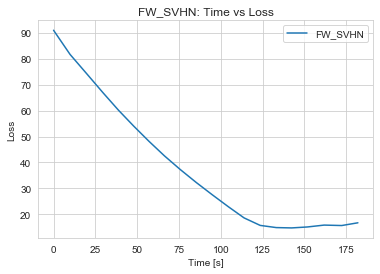

In [51]:
plot('fw_svhn', loss_fw_svhn, time_fw_svhn)

In [52]:
#does the minimum point respect the bound on the domain?
np.linalg.norm(weights_fw_svhn, ord='nuc')

3.3708835037908416

## SFW

In [53]:
loss_sfw_svhn, time_sfw_svhn, weigths_sfw_svhn = sfw(W=weights_initial_svhn, X=features_svhn, y=classes_svhn, 
                                                     lr=0.0001, maxit=1000, step_width=sw, time_to_run=t)

Iteration: 1;  Time Elapsed: 0;  Loss: 90.98750577411148
Iteration: 1;  Time Elapsed: 4.066626310348511;  Loss: 82.94281254645509
Iteration: 2;  Time Elapsed: 6.372020959854126;  Loss: 79.49360877083328
Iteration: 3;  Time Elapsed: 8.504258155822754;  Loss: 73.5419479316521
Iteration: 4;  Time Elapsed: 10.603847980499268;  Loss: 67.57970920425835
Iteration: 5;  Time Elapsed: 12.692234992980957;  Loss: 59.955886489734624
Iteration: 6;  Time Elapsed: 14.831295251846313;  Loss: 54.38733147210863
Iteration: 7;  Time Elapsed: 16.955183744430542;  Loss: 48.40594475973772
Iteration: 8;  Time Elapsed: 19.082128763198853;  Loss: 43.487196891196085
Iteration: 9;  Time Elapsed: 21.226009845733643;  Loss: 38.18613136822137
Iteration: 10;  Time Elapsed: 23.338642597198486;  Loss: 33.55369957601355
Iteration: 11;  Time Elapsed: 25.52969741821289;  Loss: 29.151827978319623
Iteration: 12;  Time Elapsed: 27.588809728622437;  Loss: 24.64762851663746
Iteration: 13;  Time Elapsed: 29.638302326202393;  Los

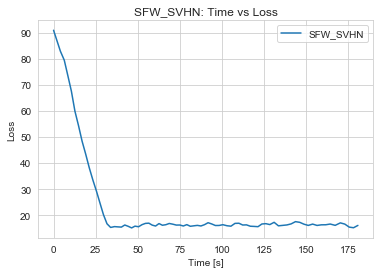

In [54]:
plot('sfw_svhn', loss_sfw_svhn, time_sfw_svhn)

In [55]:
#does the minimum point respect the bound on the domain?
print(np.linalg.norm(weigths_sfw_svhn, ord = 'nuc'))

3.516801847066652


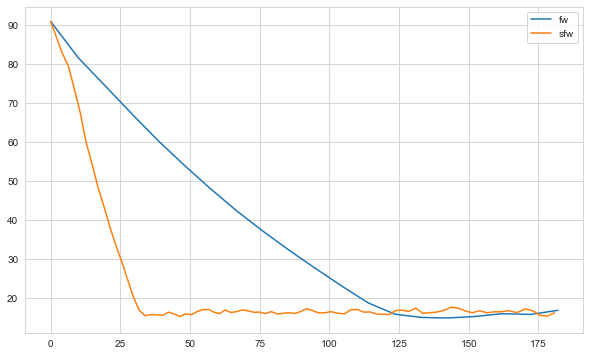

In [57]:
plt.figure(figsize=(10,6))
plt.plot(time_fw_svhn, loss_fw_svhn, label='fw')
plt.plot(time_sfw_svhn, loss_sfw_svhn, label='sfw')
plt.legend()
plt.show()

## SVRF

In [58]:
loss_svrf_svhn, time_svrf_svhn, weights_svrf_svhn = svrf(W = weights_initial_svhn.copy(), X= features_svhn, 
                                                         y=  classes_svhn, epochs=10, time_to_run=t, step_width = sw, 
                                                         lr=0.0001)

Iteration: 1;  Time Elapsed: 0;  Loss: 90.98750577411148
Iteration: 1;  Time Elapsed: 9.645662069320679;  Loss: 81.65938128590315
Iteration: 2;  Time Elapsed: 11.65326738357544;  Loss: 75.05388063312044
Iteration: 3;  Time Elapsed: 13.790305852890015;  Loss: 67.95056105877178
Iteration: 4;  Time Elapsed: 15.829146146774292;  Loss: 63.68828312274461
Iteration: 5;  Time Elapsed: 17.87189745903015;  Loss: 57.64017936018115
Iteration: 6;  Time Elapsed: 19.892377138137817;  Loss: 51.976690198894374
Iteration: 7;  Time Elapsed: 21.965880870819092;  Loss: 46.9039369817428
Iteration: 8;  Time Elapsed: 24.055795192718506;  Loss: 42.08673711580206
Iteration: 9;  Time Elapsed: 26.04686975479126;  Loss: 38.252067052948206
Iteration: 10;  Time Elapsed: 28.03784155845642;  Loss: 34.63804551807883
Iteration: 11;  Time Elapsed: 30.021908044815063;  Loss: 30.323918289766542
Iteration: 12;  Time Elapsed: 31.986488103866577;  Loss: 25.19226426756436
Iteration: 13;  Time Elapsed: 33.9613983631134;  Loss: 

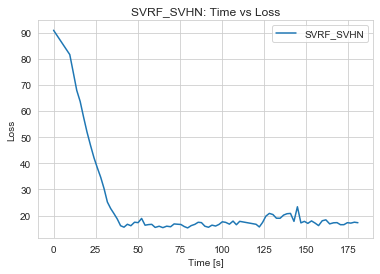

In [59]:
plot('svrf_svhn', loss_svrf_svhn, time_svrf_svhn)

In [60]:
#does the minimum point respect the bound on the domain?
print(np.linalg.norm(weights_svrf_svhn, ord = 'nuc'))

3.4893121830963887


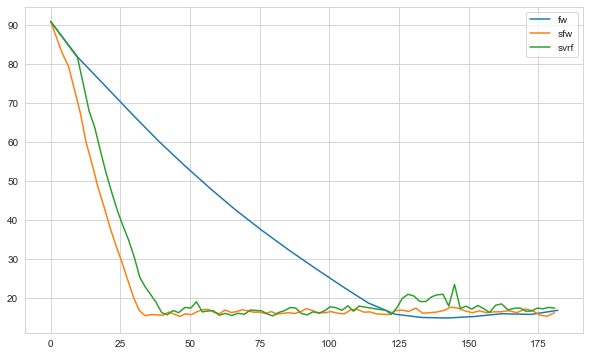

In [61]:
plt.figure(figsize=(10,6))
plt.plot(time_fw_svhn, loss_fw_svhn, label='fw')
plt.plot(time_sfw_svhn, loss_sfw_svhn, label='sfw')
plt.plot(time_svrf_svhn, loss_svrf_svhn, label='svrf')
plt.legend()
plt.show()

## SCGS

In [62]:
info_fwg_svhn, loss_scgs_svhn, time_scgs_svhn, weights_scgs_svhn = scgs(W = weights_initial_svhn.copy(), 
                                                                        X= features_svhn, y = classes_svhn, 
                                                                        maxit = 1000, step_width=sw, time_to_run=t, 
                                                                        lr=0.0001, lr_fwg = 0.1)

Iteration: 1;  Time Elapsed: 0;  Loss: 90.98750577411148
Iteration: 1;  Time Elapsed: 5.947519063949585;  Loss: 83.04952748651566
Iteration: 2;  Time Elapsed: 9.394682884216309;  Loss: 76.56912587996675
Iteration: 3;  Time Elapsed: 13.122762680053711;  Loss: 70.2960771356855
Iteration: 4;  Time Elapsed: 16.818295001983643;  Loss: 63.69080145537425
Iteration: 5;  Time Elapsed: 20.439826726913452;  Loss: 58.052505492908644
Iteration: 6;  Time Elapsed: 24.311423301696777;  Loss: 52.367437273129944
Iteration: 7;  Time Elapsed: 28.085099935531616;  Loss: 47.74848657540516
Iteration: 8;  Time Elapsed: 32.03341031074524;  Loss: 42.523113309865444
Iteration: 9;  Time Elapsed: 36.037315368652344;  Loss: 38.73216297809891
Iteration: 10;  Time Elapsed: 39.971203088760376;  Loss: 33.98846591716041
Iteration: 11;  Time Elapsed: 43.88427925109863;  Loss: 30.034446142567948
Iteration: 12;  Time Elapsed: 47.84937405586243;  Loss: 26.09348428074346
Iteration: 13;  Time Elapsed: 51.84776425361633;  Loss

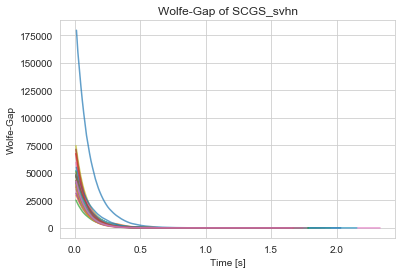

In [63]:
plot_wg("SCGS_svhn",info_fwg_svhn,1)

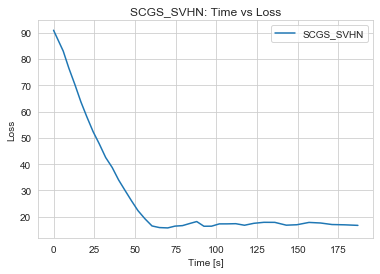

In [64]:
plot('scgs_svhn', loss_scgs_svhn, time_scgs_svhn)

In [65]:
#does the minimum point respect the bound on the domain?
np.linalg.norm(weights_scgs_svhn, ord='nuc')

3.403374752988043

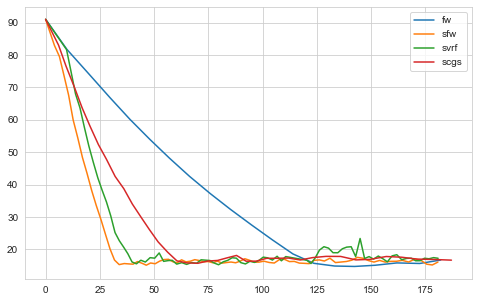

In [66]:
plt.figure(figsize=(8,5))
plt.plot(time_fw_svhn, loss_fw_svhn, label='fw')
plt.plot(time_sfw_svhn, loss_sfw_svhn, label='sfw')
plt.plot(time_svrf_svhn, loss_svrf_svhn, label='svrf')
plt.plot(time_scgs_svhn, loss_scgs_svhn, label='scgs')
plt.legend()
plt.show()

## STORC

In [67]:
info_fwg_svhn, loss_storc_svhn, time_storc_svhn, weights_storc_svhn = storc(W = weights_initial_svhn.copy(), 
                                                                            X= features_svhn, y=classes_svhn, 
                                                                            epochs=10, step_width=sw, time_to_run=t, 
                                                                            lr=0.0001, lr_fwg=0.5)

Iteration: 1;  Time Elapsed: 0;  Loss: 90.98750577411148
Iteration: 1;  Time Elapsed: 9.823604583740234;  Loss: 81.65939842428767
Iteration: 2;  Time Elapsed: 11.863301753997803;  Loss: 75.52202053102798
Iteration: 3;  Time Elapsed: 13.851144790649414;  Loss: 67.92818674998955
Iteration: 4;  Time Elapsed: 15.833858251571655;  Loss: 63.12467529635917
Iteration: 5;  Time Elapsed: 17.821757555007935;  Loss: 56.635094006396486
Iteration: 6;  Time Elapsed: 19.80746054649353;  Loss: 51.51939213212563
Iteration: 7;  Time Elapsed: 21.789913415908813;  Loss: 46.38755851478358
Iteration: 8;  Time Elapsed: 23.778753995895386;  Loss: 42.33460469524952
Iteration: 9;  Time Elapsed: 25.820292949676514;  Loss: 37.86570752216016
Iteration: 10;  Time Elapsed: 27.835069179534912;  Loss: 33.983472793618105
Iteration: 11;  Time Elapsed: 29.90552020072937;  Loss: 30.0624348032224
Iteration: 12;  Time Elapsed: 31.956356048583984;  Loss: 26.44481758200007
Iteration: 13;  Time Elapsed: 33.94505214691162;  Loss

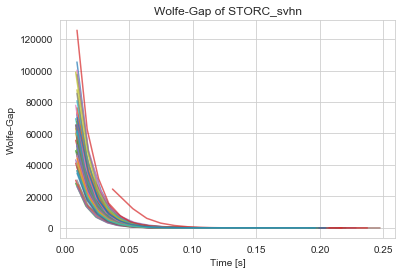

In [68]:
plot_wg("STORC_svhn",info_fwg_svhn,1)

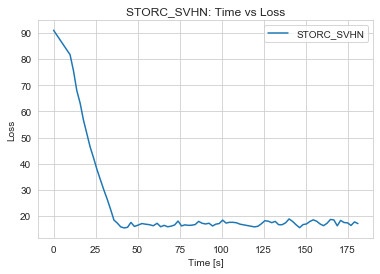

In [69]:
plot('storc_svhn', loss_storc_svhn, time_storc_svhn)

In [75]:
#does the minimum point respect the bound on the domain?
np.linalg.norm(weights_storc_svhn, ord='nuc')

3.4976697679031203

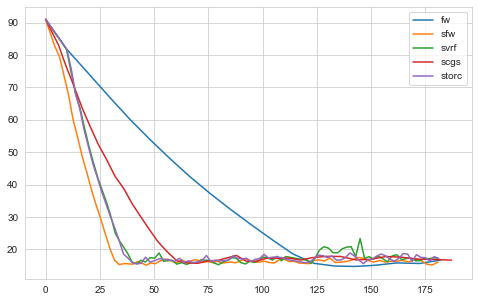

In [74]:
plt.figure(figsize=(8,5))
plt.plot(time_fw_svhn, loss_fw_svhn, label='fw')
plt.plot(time_sfw_svhn, loss_sfw_svhn, label='sfw')
plt.plot(time_svrf_svhn, loss_svrf_svhn, label='svrf')
plt.plot(time_scgs_svhn, loss_scgs_svhn, label='scgs')
plt.plot(time_storc_svhn, loss_storc_svhn, label='storc')
plt.legend()
plt.show()

## SGM

In [76]:
loss_sgm_svhn, time_sgm_svhn, W_sgm_svhn = sgm(W = weights_initial_svhn.copy(), X = features_svhn, y = classes_svhn, 
                                               lr=0.0001, step_width=sw, maxit = 1000, time_to_run=t, 
                                               batch_size=100, s=0.5)

Iteration: 1;  Time Elapsed: 0;  Loss: 90.98750577411148
Iteration: 1;  Time Elapsed: 3.5515222549438477;  Loss: 81.94423081178313
Iteration: 2;  Time Elapsed: 5.286916971206665;  Loss: 75.0793565195203
Iteration: 3;  Time Elapsed: 6.973403453826904;  Loss: 68.09574334247404
Iteration: 4;  Time Elapsed: 8.724685668945312;  Loss: 61.18461782180324
Iteration: 5;  Time Elapsed: 10.434552907943726;  Loss: 55.430152996368236
Iteration: 6;  Time Elapsed: 12.150867700576782;  Loss: 49.6961773096299
Iteration: 7;  Time Elapsed: 13.869969367980957;  Loss: 44.62084640078681
Iteration: 8;  Time Elapsed: 15.635264158248901;  Loss: 40.19619443056198
Iteration: 9;  Time Elapsed: 17.36081576347351;  Loss: 35.046749414027786
Iteration: 10;  Time Elapsed: 19.114704847335815;  Loss: 30.83024723923663
Iteration: 11;  Time Elapsed: 21.04466414451599;  Loss: 26.172230880657665
Iteration: 12;  Time Elapsed: 23.08542799949646;  Loss: 22.327934529266432
Iteration: 13;  Time Elapsed: 25.31540274620056;  Loss: 

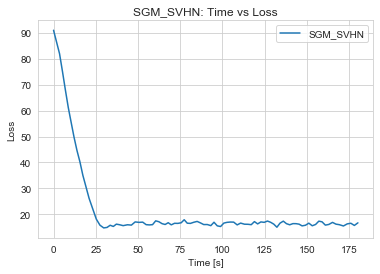

In [77]:
plot('sgm_svhn', loss_sgm_svhn, time_sgm_svhn)

In [78]:
#does the minimum point respect the bound on the domain? 
np.linalg.norm(W_sgm_svhn, ord='nuc')

3.5452525453498724

## SVRG

In [79]:
loss_svrg_svhn, time_svrg_svhn, W_svrg_svhn = svrg(W = weights_initial_svhn.copy(), X = features_svhn, y = classes_svhn,
                                                   lr=0.0001, step_width=sw, maxit = 1000, time_to_run=t, 
                                                   batch_size=100, s=0.5, epochs=20)

Iteration: 1;  Time Elapsed: 0;  Loss: 90.98750577411148
Iteration: 1;  Time Elapsed: 10.068251371383667;  Loss: 81.65938937916947
Iteration: 2;  Time Elapsed: 11.93349552154541;  Loss: 74.30198873830598
Iteration: 3;  Time Elapsed: 13.970232009887695;  Loss: 67.82285252409596
Iteration: 4;  Time Elapsed: 15.86967134475708;  Loss: 61.18365988860239
Iteration: 5;  Time Elapsed: 17.800641298294067;  Loss: 55.316866727539754
Iteration: 6;  Time Elapsed: 19.679627418518066;  Loss: 49.66397535060022
Iteration: 7;  Time Elapsed: 21.556893825531006;  Loss: 44.615473303577446
Iteration: 8;  Time Elapsed: 23.43588161468506;  Loss: 40.06660873030502
Iteration: 9;  Time Elapsed: 25.316850185394287;  Loss: 34.68956260158698
Iteration: 10;  Time Elapsed: 27.177300691604614;  Loss: 29.924338135005666
Iteration: 11;  Time Elapsed: 29.117111921310425;  Loss: 25.189630072014268
Iteration: 12;  Time Elapsed: 31.0130398273468;  Loss: 20.70362066485315
Iteration: 13;  Time Elapsed: 32.92000865936279;  Los

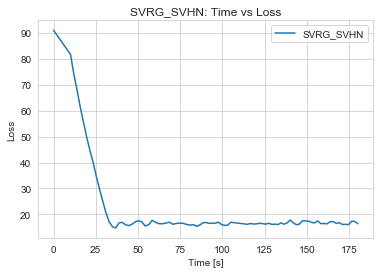

In [80]:
plot('svrg_svhn', loss_svrg_svhn, time_svrg_svhn)

In [81]:
#does the minimum point respect the bound on the domain? 
np.linalg.norm(W_svrg_svhn, ord='nuc')

3.533974157556554

## Recap

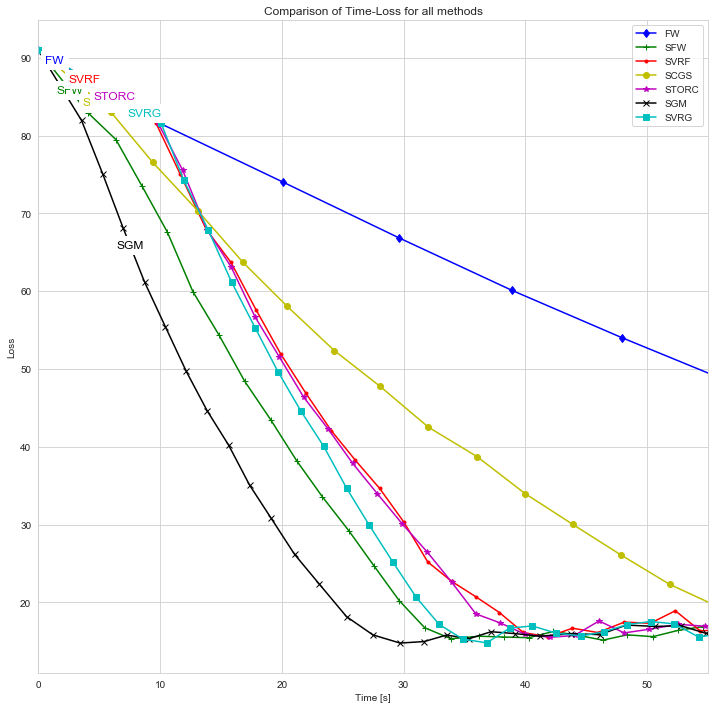

In [84]:
plot_all(['FW', 'SFW','SVRF','SCGS','STORC','SGM','SVRG'], 
         [loss_fw_svhn, loss_sfw_svhn,loss_svrf_svhn,loss_scgs_svhn,loss_storc_svhn,loss_sgm_svhn,loss_svrg_svhn], 
         [time_fw_svhn, time_sfw_svhn,time_svrf_svhn,time_scgs_svhn,time_storc_svhn,time_sgm_svhn,time_svrg_svhn], 
         xlimit=(0,55), name='_SVHN')

# small NORB

Source https://cs.nyu.edu/~ylclab/data/norb-v1.0-small/

(we used the downsampled version)

In [89]:
features_norb, classes_norb = get_data("data/smallNORB/smallNORB-32x32.bz2")

# don't need sparse format
features_norb = features_norb.A

In [90]:
# as usual we need the transpose of the data
features_norb = features_norb.T
features_norb.shape

(2048, 24300)

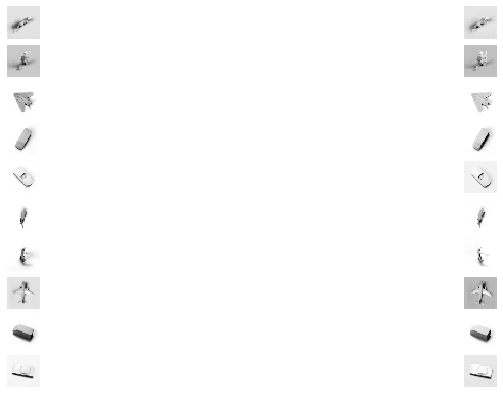

In [91]:
# visualization of the two different channels related to each sample
k=10

fig, axes = plt.subplots(k,2, figsize=(15,7))

for i in range(k):
    im = np.reshape(features_norb[:1024, i], (32,32))
    _ = axes[i,0].imshow(im, cmap="gray")
    im = np.reshape(features_norb[1024:2048, i], (32,32))
    _ = axes[i,1].imshow(im, cmap="gray")
    axes[i,0].axis('off')
    axes[i,0].grid(b=None)
    axes[i,1].axis('off')
    axes[i,1].grid(b=None)

In [93]:
classes_norb = classes_norb.astype(int)

# modify the global variables N, M, H inside the imported module
set_global_dimentions(N_new = features_norb.shape[1],M_new = features_norb.shape[0], H_new = len(np.unique(classes_norb)))
from all_functions_corrected import N, M, H

print("M (n. of features_norb): {}, N (n. of samples): {}, H (n. of classes_norb): {}".format(M, N, H))

M (n. of features_norb): 2048, N (n. of samples): 24300, H (n. of classes_norb): 5


In [94]:
#initialize initial weights as a sparse matrix. 
# remember: in the case of MNIST dataset the shape was 11x784
# now the shape is 1000 x sample_size --> much biggher --> much lower density to obtain nuclear norm <= 50

np.random.seed(420)
weights_initial = scipy.sparse.random(H, M, density=0.0006).A
#weights_initial = np.zeros((H,M))
print("Nuclear norm of initial weights: {}\n".format(np.linalg.norm(weights_initial, ord='nuc')))
print("Shape of initial weights: {} \n".format(weights_initial.shape))
print("Initial Loss: {}".format(loss_function(weights_initial, features_norb, classes_norb)))

Nuclear norm of initial weights: 4.866511508398176

Shape of initial weights: (5, 2048) 

Initial Loss: 117.0333578445606


## FW

In [95]:
loss_fw_norb, time_fw_norb, weights_fw_norb = fw(W = weights_initial, X = features_norb, y = classes_norb, 
                                  lr = 0.00002, maxit = 1000, step_width=sw, time_to_run=t)

Iteration: 1;  Time Elapsed: 0;  Loss: 117.0333578445606
Iteration: 1;  Time Elapsed: 1.747220754623413;  Loss: 109.90720210553883
Iteration: 2;  Time Elapsed: 3.480621576309204;  Loss: 102.80899854077697
Iteration: 3;  Time Elapsed: 5.100970506668091;  Loss: 95.75342136733815
Iteration: 4;  Time Elapsed: 6.692608833312988;  Loss: 88.7616451282887
Iteration: 5;  Time Elapsed: 8.281357765197754;  Loss: 81.87359335281919
Iteration: 6;  Time Elapsed: 9.829411745071411;  Loss: 75.12342391657234
Iteration: 7;  Time Elapsed: 11.420169115066528;  Loss: 68.54713014392811
Iteration: 8;  Time Elapsed: 12.980995655059814;  Loss: 62.17265618739573
Iteration: 9;  Time Elapsed: 14.54283094406128;  Loss: 56.03299255529934
Iteration: 10;  Time Elapsed: 16.092684030532837;  Loss: 50.17915681089147
Iteration: 11;  Time Elapsed: 17.65450668334961;  Loss: 44.64509906883496
Iteration: 12;  Time Elapsed: 19.210358381271362;  Loss: 39.45899563722087
Iteration: 13;  Time Elapsed: 20.761223077774048;  Loss: 34

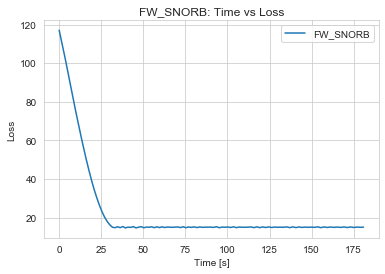

In [96]:
plot('fw_snorb', loss_fw_norb, time_fw_norb)

In [97]:
#does the minimum point respect the bound on the domain?
np.linalg.norm(weights_fw_norb, ord='nuc')

4.855214032378263

## SFW

In [98]:
loss_sfw_norb, time_sfw_norb, weights_sfw_norb = sfw(W=weights_initial.copy(), X=features_norb, y=classes_norb, 
                                      lr=0.00001, maxit=1000, step_width=sw, time_to_run=t)

Iteration: 1;  Time Elapsed: 0;  Loss: 117.0333578445606
Iteration: 1;  Time Elapsed: 0.32663941383361816;  Loss: 120.57386133467904
Iteration: 2;  Time Elapsed: 0.48920536041259766;  Loss: 117.00796231737594
Iteration: 3;  Time Elapsed: 0.6896693706512451;  Loss: 113.4427103584948
Iteration: 4;  Time Elapsed: 0.8881387710571289;  Loss: 109.88921299853482
Iteration: 5;  Time Elapsed: 1.0955827236175537;  Loss: 106.34134650782073
Iteration: 6;  Time Elapsed: 1.2681210041046143;  Loss: 102.79347883846214
Iteration: 7;  Time Elapsed: 1.507481575012207;  Loss: 99.25452984717602
Iteration: 8;  Time Elapsed: 1.7209103107452393;  Loss: 95.7260463247004
Iteration: 9;  Time Elapsed: 1.9393270015716553;  Loss: 92.22457053072559
Iteration: 10;  Time Elapsed: 2.1383018493652344;  Loss: 88.75649668230281
Iteration: 11;  Time Elapsed: 2.3547232151031494;  Loss: 85.29569484229611
Iteration: 12;  Time Elapsed: 2.5990705490112305;  Loss: 81.88330256851356
Iteration: 13;  Time Elapsed: 2.805027246475219

Iteration: 110;  Time Elapsed: 53.23550033569336;  Loss: 14.690777889732903
Iteration: 111;  Time Elapsed: 54.29168963432312;  Loss: 14.684285594157883
Iteration: 112;  Time Elapsed: 55.35287857055664;  Loss: 14.69525687382092
Iteration: 113;  Time Elapsed: 56.427006244659424;  Loss: 14.684723638116136
Iteration: 114;  Time Elapsed: 57.49016189575195;  Loss: 14.694675288547932
Iteration: 115;  Time Elapsed: 58.59223127365112;  Loss: 14.683134257596786
Iteration: 116;  Time Elapsed: 59.71024012565613;  Loss: 14.695366699490355
Iteration: 117;  Time Elapsed: 60.82226514816284;  Loss: 14.68032547793812
Iteration: 118;  Time Elapsed: 61.96221685409546;  Loss: 14.689587917921239
Iteration: 119;  Time Elapsed: 63.10134243965149;  Loss: 14.685487090458539
Iteration: 120;  Time Elapsed: 64.28816819190979;  Loss: 14.692168876438501
Iteration: 121;  Time Elapsed: 65.47158217430115;  Loss: 14.681012899518866
Iteration: 122;  Time Elapsed: 66.7122642993927;  Loss: 14.683467673069181
Iteration: 123

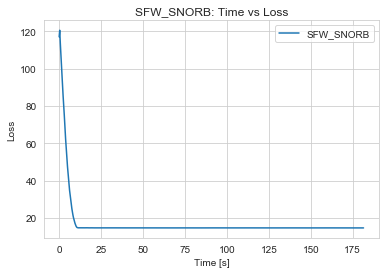

In [99]:
plot('sfw_snorb', loss_sfw_norb, time_sfw_norb)

In [100]:
#does the minimum point respect the bound on the domain?
print(np.linalg.norm(weights_sfw_norb, ord = 'nuc'))

4.8563443265269095


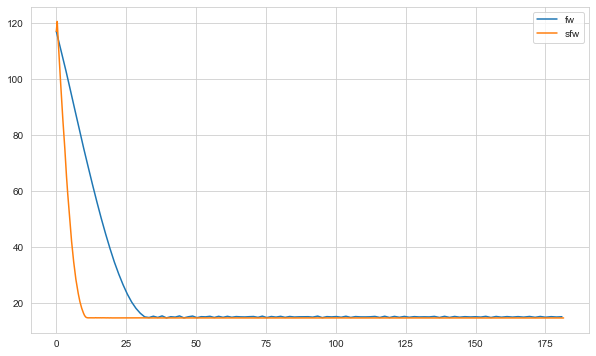

In [101]:
plt.figure(figsize=(10,6))
plt.plot(time_fw_norb, loss_fw_norb, label='fw')
plt.plot(time_sfw_norb, loss_sfw_norb, label='sfw')
plt.legend()
plt.show()

## SVRF

In [102]:
loss_svrf_norb, time_svrf_norb, weights_svrf_norb = svrf(W = weights_initial.copy(), X= features_norb, y=  classes_norb, epochs=50, 
                                          time_to_run=t, step_width = sw, lr=0.00001)

Iteration: 1;  Time Elapsed: 0;  Loss: 117.0333578445606
Iteration: 1;  Time Elapsed: 2.2148303985595703;  Loss: 113.46781675225604
Iteration: 2;  Time Elapsed: 2.3624327182769775;  Loss: 109.90723768215128
Iteration: 3;  Time Elapsed: 2.5110363960266113;  Loss: 106.35275584532178
Iteration: 4;  Time Elapsed: 2.6536550521850586;  Loss: 102.80460868869187
Iteration: 5;  Time Elapsed: 2.8341705799102783;  Loss: 99.26556076340854
Iteration: 6;  Time Elapsed: 3.043612480163574;  Loss: 95.73722713701507
Iteration: 7;  Time Elapsed: 3.211162567138672;  Loss: 92.22156532386337
Iteration: 8;  Time Elapsed: 3.3797121047973633;  Loss: 88.96175346745459
Iteration: 9;  Time Elapsed: 3.5303239822387695;  Loss: 85.48057341009157
Iteration: 10;  Time Elapsed: 3.6839137077331543;  Loss: 82.02475407827896
Iteration: 11;  Time Elapsed: 3.873405933380127;  Loss: 78.59802916277637
Iteration: 12;  Time Elapsed: 4.0329811573028564;  Loss: 75.20497003817005
Iteration: 13;  Time Elapsed: 4.182582139968872;  L

Iteration: 111;  Time Elapsed: 23.57515573501587;  Loss: 14.712194056142271
Iteration: 112;  Time Elapsed: 23.71777367591858;  Loss: 14.780407460222458
Iteration: 113;  Time Elapsed: 23.876447200775146;  Loss: 14.86199315842014
Iteration: 114;  Time Elapsed: 24.029998540878296;  Loss: 15.105351972164973
Iteration: 115;  Time Elapsed: 24.19156575202942;  Loss: 14.753368761765012
Iteration: 116;  Time Elapsed: 24.356144666671753;  Loss: 14.682940159656289
Iteration: 117;  Time Elapsed: 24.52070426940918;  Loss: 14.75494370859408
Iteration: 118;  Time Elapsed: 24.668309211730957;  Loss: 14.6938150810256
Iteration: 119;  Time Elapsed: 24.83087730407715;  Loss: 14.79136686985845
Iteration: 120;  Time Elapsed: 24.978482961654663;  Loss: 14.683290324901789
Iteration: 121;  Time Elapsed: 25.135063409805298;  Loss: 14.782791472262593
Iteration: 122;  Time Elapsed: 25.288651943206787;  Loss: 14.810793870907332
Iteration: 123;  Time Elapsed: 25.464182376861572;  Loss: 14.778097527975993
Iteration

Iteration: 219;  Time Elapsed: 44.580283641815186;  Loss: 14.706458283088727
Iteration: 220;  Time Elapsed: 44.73387312889099;  Loss: 14.700156056873382
Iteration: 221;  Time Elapsed: 44.89344787597656;  Loss: 14.685178691860385
Iteration: 222;  Time Elapsed: 45.04105281829834;  Loss: 14.74809475373062
Iteration: 223;  Time Elapsed: 45.206607818603516;  Loss: 14.752479485722287
Iteration: 224;  Time Elapsed: 45.35521078109741;  Loss: 14.88617224870579
Iteration: 225;  Time Elapsed: 45.51478409767151;  Loss: 14.752429277053146
Iteration: 226;  Time Elapsed: 45.679343461990356;  Loss: 14.677258745784318
Iteration: 227;  Time Elapsed: 45.858864307403564;  Loss: 14.735691136306677
Iteration: 228;  Time Elapsed: 46.002480030059814;  Loss: 14.680589291736025
Iteration: 229;  Time Elapsed: 46.17701244354248;  Loss: 14.736984807241841
Iteration: 230;  Time Elapsed: 46.3276093006134;  Loss: 14.72096696774579
Iteration: 231;  Time Elapsed: 46.48121666908264;  Loss: 14.66646899662907
Iteration: 2

Iteration: 327;  Time Elapsed: 65.46166348457336;  Loss: 14.655637671776018
Iteration: 328;  Time Elapsed: 65.61624908447266;  Loss: 14.651132158322968
Iteration: 329;  Time Elapsed: 65.77482485771179;  Loss: 14.653990740881381
Iteration: 330;  Time Elapsed: 65.93043303489685;  Loss: 14.66893240672168
Iteration: 331;  Time Elapsed: 66.09499001502991;  Loss: 14.655192653538716
Iteration: 332;  Time Elapsed: 66.26654481887817;  Loss: 14.651566495817347
Iteration: 333;  Time Elapsed: 66.46403384208679;  Loss: 14.651582700990774
Iteration: 334;  Time Elapsed: 66.6226098537445;  Loss: 14.656060918325135
Iteration: 335;  Time Elapsed: 66.78118681907654;  Loss: 14.649778134275842
Iteration: 336;  Time Elapsed: 66.98663830757141;  Loss: 14.65462109020651
Iteration: 337;  Time Elapsed: 67.14920449256897;  Loss: 14.6486766000255
Iteration: 338;  Time Elapsed: 67.31675410270691;  Loss: 14.651418588156941
Iteration: 339;  Time Elapsed: 67.48430562019348;  Loss: 14.64897741679291
Iteration: 340;  T

Iteration: 436;  Time Elapsed: 86.8344669342041;  Loss: 14.683876519833735
Iteration: 437;  Time Elapsed: 86.99803018569946;  Loss: 14.657018756499324
Iteration: 438;  Time Elapsed: 87.17455625534058;  Loss: 14.667506974235135
Iteration: 439;  Time Elapsed: 87.33612370491028;  Loss: 14.74248869020787
Iteration: 440;  Time Elapsed: 87.50965976715088;  Loss: 14.690187141176466
Iteration: 441;  Time Elapsed: 87.67920780181885;  Loss: 14.747794226059327
Iteration: 442;  Time Elapsed: 87.85373902320862;  Loss: 14.681776442347303
Iteration: 443;  Time Elapsed: 88.01929688453674;  Loss: 14.687487318876228
Iteration: 444;  Time Elapsed: 88.18684840202332;  Loss: 14.627724124511923
Iteration: 445;  Time Elapsed: 88.36839318275452;  Loss: 14.656354988735126
Iteration: 446;  Time Elapsed: 88.54990792274475;  Loss: 14.653581441650134
Iteration: 447;  Time Elapsed: 88.70848417282104;  Loss: 14.67437185772583
Iteration: 448;  Time Elapsed: 88.8790283203125;  Loss: 14.642512261021878
Iteration: 449; 

Iteration: 544;  Time Elapsed: 107.64752840995789;  Loss: 14.635302600211144
Iteration: 545;  Time Elapsed: 107.80510663986206;  Loss: 14.64793423781557
Iteration: 546;  Time Elapsed: 107.97565197944641;  Loss: 14.653317085655196
Iteration: 547;  Time Elapsed: 108.12724471092224;  Loss: 14.678784150107653
Iteration: 548;  Time Elapsed: 108.30379605293274;  Loss: 14.655834440677273
Iteration: 549;  Time Elapsed: 108.45937895774841;  Loss: 14.652058246439147
Iteration: 550;  Time Elapsed: 108.619948387146;  Loss: 14.636209817949176
Iteration: 551;  Time Elapsed: 110.5399706363678;  Loss: 14.632469193143052
Iteration: 552;  Time Elapsed: 110.66463732719421;  Loss: 14.807181508944907
Iteration: 553;  Time Elapsed: 110.80725502967834;  Loss: 15.724053259047764
Iteration: 554;  Time Elapsed: 110.94289064407349;  Loss: 16.31593333393998
Iteration: 555;  Time Elapsed: 111.08753776550293;  Loss: 15.363604822511025
Iteration: 556;  Time Elapsed: 111.24209356307983;  Loss: 15.41375420047411
Itera

Iteration: 653;  Time Elapsed: 130.43061304092407;  Loss: 14.70919272064333
Iteration: 654;  Time Elapsed: 130.5812122821808;  Loss: 14.659436378324067
Iteration: 655;  Time Elapsed: 130.72482466697693;  Loss: 14.63909868424482
Iteration: 656;  Time Elapsed: 130.8684413433075;  Loss: 14.637654359445285
Iteration: 657;  Time Elapsed: 131.04098057746887;  Loss: 14.633961880358266
Iteration: 658;  Time Elapsed: 131.1905815601349;  Loss: 14.630803477205255
Iteration: 659;  Time Elapsed: 131.3351926803589;  Loss: 14.613674721710776
Iteration: 660;  Time Elapsed: 131.48379850387573;  Loss: 14.610651591256556
Iteration: 661;  Time Elapsed: 131.64139223098755;  Loss: 14.630716386211434
Iteration: 662;  Time Elapsed: 131.7899947166443;  Loss: 14.61693048508514
Iteration: 663;  Time Elapsed: 131.94657707214355;  Loss: 14.822455344817508
Iteration: 664;  Time Elapsed: 132.1131296157837;  Loss: 14.963607875130272
Iteration: 665;  Time Elapsed: 132.27370238304138;  Loss: 14.778038611761682
Iteratio

Iteration: 761;  Time Elapsed: 150.94399571418762;  Loss: 14.588619389747459
Iteration: 762;  Time Elapsed: 151.10357213020325;  Loss: 14.579727191042712
Iteration: 763;  Time Elapsed: 151.2771074771881;  Loss: 14.59294532688325
Iteration: 764;  Time Elapsed: 151.4237163066864;  Loss: 14.596876659505565
Iteration: 765;  Time Elapsed: 151.58528017997742;  Loss: 14.596785685733215
Iteration: 766;  Time Elapsed: 151.740864276886;  Loss: 14.575396769911093
Iteration: 767;  Time Elapsed: 151.90243268013;  Loss: 14.583191321105284
Iteration: 768;  Time Elapsed: 152.05003714561462;  Loss: 14.587710952229903
Iteration: 769;  Time Elapsed: 152.21459698677063;  Loss: 14.570531445192872
Iteration: 770;  Time Elapsed: 152.3632001876831;  Loss: 14.592739342651774
Iteration: 771;  Time Elapsed: 152.51878380775452;  Loss: 14.600398888227287
Iteration: 772;  Time Elapsed: 152.698303937912;  Loss: 14.693238577819688
Iteration: 773;  Time Elapsed: 152.85588335990906;  Loss: 14.59889525443078
Iteration: 

Iteration: 869;  Time Elapsed: 171.7130172252655;  Loss: 14.631101734546753
Iteration: 870;  Time Elapsed: 171.87159276008606;  Loss: 14.71330236158846
Iteration: 871;  Time Elapsed: 172.0371491909027;  Loss: 14.618479556863981
Iteration: 872;  Time Elapsed: 172.18674993515015;  Loss: 14.59091522159934
Iteration: 873;  Time Elapsed: 172.35632991790771;  Loss: 14.583491469286795
Iteration: 874;  Time Elapsed: 172.50988483428955;  Loss: 14.69808158211327
Iteration: 875;  Time Elapsed: 172.6844184398651;  Loss: 14.647980920369061
Iteration: 876;  Time Elapsed: 172.83900475502014;  Loss: 14.65437622868072
Iteration: 877;  Time Elapsed: 172.99558782577515;  Loss: 14.690813761937326
Iteration: 878;  Time Elapsed: 173.14817762374878;  Loss: 14.649138141989898
Iteration: 879;  Time Elapsed: 173.31074261665344;  Loss: 14.666356234106944
Iteration: 880;  Time Elapsed: 173.47032260894775;  Loss: 14.70034538300695
Iteration: 881;  Time Elapsed: 173.64086508750916;  Loss: 14.695260872366957
Iterati

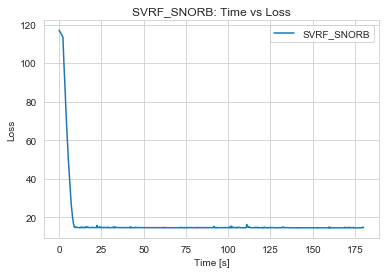

In [103]:
plot('svrf_snorb', loss_svrf_norb, time_svrf_norb)

In [104]:
#does the minimum point respect the bound on the domain?
print(np.linalg.norm(weights_svrf_norb, ord = 'nuc'))

4.890839685791961


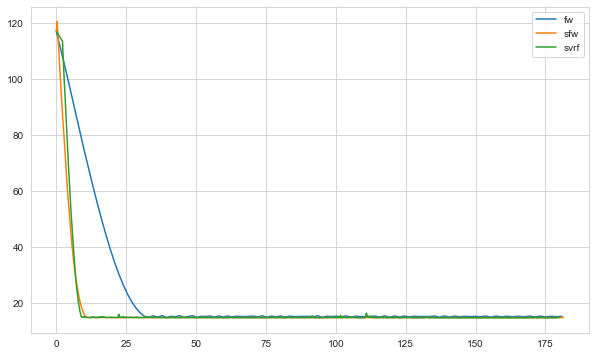

In [105]:
plt.figure(figsize=(10,6))
plt.plot(time_fw_norb, loss_fw_norb, label='fw')
plt.plot(time_sfw_norb, loss_sfw_norb, label='sfw')
plt.plot(time_svrf_norb, loss_svrf_norb, label='svrf')
plt.legend()
plt.show()

## SCGS

In [106]:
info_fwg_norb, loss_scgs_norb, time_scgs_norb, weights_scgs = scgs(W = weights_initial.copy(), X= features_norb, y = classes_norb, maxit = 1000, 
                                                    step_width=sw, time_to_run=t, lr=0.000015, lr_fwg = 0.3)

Iteration: 1;  Time Elapsed: 0;  Loss: 117.0333578445606
Iteration: 1;  Time Elapsed: 1.6007633209228516;  Loss: 111.70083624261471
Iteration: 2;  Time Elapsed: 2.557223320007324;  Loss: 106.37386469464454
Iteration: 3;  Time Elapsed: 3.466810464859009;  Loss: 101.09716304848205
Iteration: 4;  Time Elapsed: 4.479101657867432;  Loss: 95.79968272628497
Iteration: 5;  Time Elapsed: 5.326834440231323;  Loss: 90.53366507916192
Iteration: 6;  Time Elapsed: 6.268352508544922;  Loss: 85.33380405701196
Iteration: 7;  Time Elapsed: 7.404311418533325;  Loss: 80.29490175880144
Iteration: 8;  Time Elapsed: 8.48842978477478;  Loss: 75.2547341454643
Iteration: 9;  Time Elapsed: 9.576519250869751;  Loss: 70.33101944808506
Iteration: 10;  Time Elapsed: 10.515008687973022;  Loss: 65.4778606743832
Iteration: 11;  Time Elapsed: 11.656953811645508;  Loss: 60.77029924599519
Iteration: 12;  Time Elapsed: 12.994396686553955;  Loss: 56.23229971671176
Iteration: 13;  Time Elapsed: 13.982753276824951;  Loss: 51.

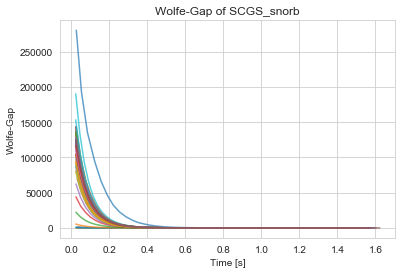

In [107]:
plot_wg("SCGS_snorb",info_fwg_norb,1)

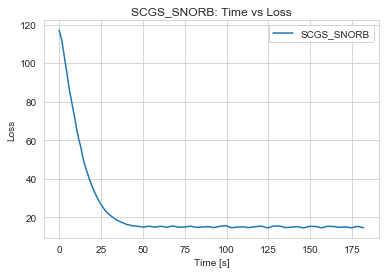

In [108]:
plot('scgs_snorb', loss_scgs_norb, time_scgs_norb)

In [109]:
#does the minimum point respect the bound on the domain?
np.linalg.norm(weights_scgs, ord='nuc')

4.860406024947031

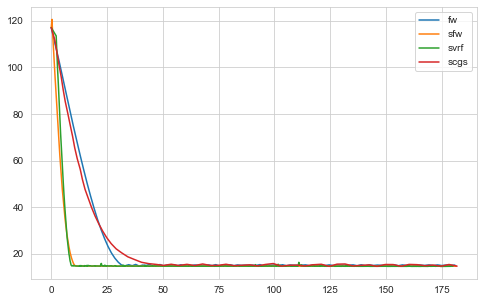

In [110]:
plt.figure(figsize=(8,5))
plt.plot(time_fw_norb, loss_fw_norb, label='fw')
plt.plot(time_sfw_norb, loss_sfw_norb, label='sfw')
plt.plot(time_svrf_norb, loss_svrf_norb, label='svrf')
plt.plot(time_scgs_norb, loss_scgs_norb, label='scgs')
plt.legend()
plt.show()

## STORC

In [111]:
info_fwg_norb, loss_storc_norb, time_storc_norb, weights_storc_norb = storc(W = weights_initial.copy(), X= features_norb, y=classes_norb, epochs=10,  
                                         step_width=sw, time_to_run=t, lr=0.00002, lr_fwg=0.3)

Iteration: 1;  Time Elapsed: 0;  Loss: 117.0333578445606
Iteration: 1;  Time Elapsed: 3.1272428035736084;  Loss: 109.90722166170194
Iteration: 2;  Time Elapsed: 3.3995141983032227;  Loss: 102.80456466568081
Iteration: 3;  Time Elapsed: 3.84332537651062;  Loss: 95.74706002818037
Iteration: 4;  Time Elapsed: 4.601300001144409;  Loss: 88.80704379216169
Iteration: 5;  Time Elapsed: 5.239591836929321;  Loss: 81.92301578461156
Iteration: 6;  Time Elapsed: 6.165117025375366;  Loss: 75.32276734915563
Iteration: 7;  Time Elapsed: 6.952009916305542;  Loss: 68.81543046754079
Iteration: 8;  Time Elapsed: 7.668112277984619;  Loss: 62.45621667681709
Iteration: 9;  Time Elapsed: 8.69638442993164;  Loss: 56.500343330050455
Iteration: 10;  Time Elapsed: 9.582438945770264;  Loss: 50.66843945183695
Iteration: 11;  Time Elapsed: 10.446175813674927;  Loss: 45.090105347742956
Iteration: 12;  Time Elapsed: 11.437523603439331;  Loss: 39.771678411856314
Iteration: 13;  Time Elapsed: 12.450825929641724;  Loss: 

Iteration: 110;  Time Elapsed: 169.4540901184082;  Loss: 15.01860536061886
Iteration: 111;  Time Elapsed: 171.01495218276978;  Loss: 15.200057694008102
Iteration: 112;  Time Elapsed: 172.7308840751648;  Loss: 16.059430772857482
Iteration: 113;  Time Elapsed: 174.58646392822266;  Loss: 15.290765287548666
Iteration: 114;  Time Elapsed: 176.26824855804443;  Loss: 15.143615599704944
Iteration: 115;  Time Elapsed: 177.89592671394348;  Loss: 14.839876159890569
Iteration: 116;  Time Elapsed: 179.69515371322632;  Loss: 15.91796843838139
Iteration: 117;  Time Elapsed: 181.33281183242798;  Loss: 15.59382564941069
181.33281183242798


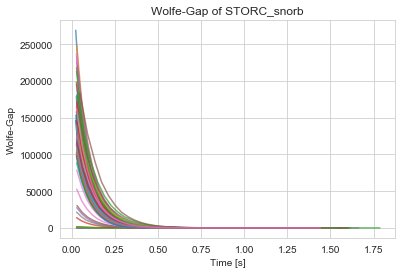

In [112]:
plot_wg("STORC_snorb",info_fwg_norb,1)

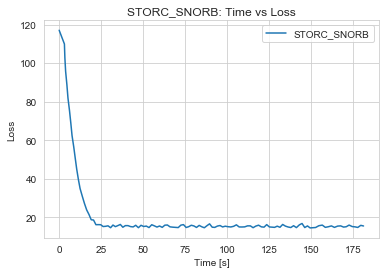

In [113]:
plot('storc_snorb', loss_storc_norb, time_storc_norb)

In [114]:
#does the minimum point respect the bound on the domain?
np.linalg.norm(weights_storc_norb, ord='nuc')

4.854120919567479

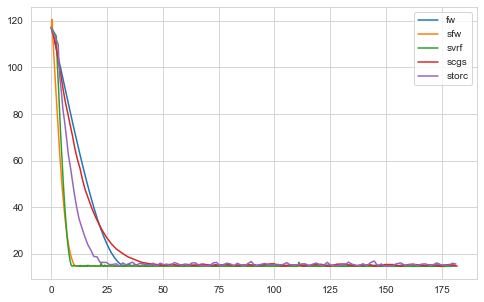

In [115]:
plt.figure(figsize=(8,5))
plt.plot(time_fw_norb, loss_fw_norb, label='fw')
plt.plot(time_sfw_norb, loss_sfw_norb, label='sfw')
plt.plot(time_svrf_norb, loss_svrf_norb, label='svrf')
plt.plot(time_scgs_norb, loss_scgs_norb, label='scgs')
plt.plot(time_storc_norb, loss_storc_norb, label='storc')
plt.legend()
plt.show()

## SGM

In [116]:
loss_sgm_norb, time_sgm_norb, W_sgm_norb = sgm(W = weights_initial.copy(), X = features_norb, y = classes_norb, lr=0.00001
                                    , step_width=sw, maxit = 1000, time_to_run=t, batch_size=100, s=0.5)

Iteration: 1;  Time Elapsed: 0;  Loss: 117.0333578445606
Iteration: 1;  Time Elapsed: 0.32509732246398926;  Loss: 113.46769218910782
Iteration: 2;  Time Elapsed: 0.5086069107055664;  Loss: 109.9071420814686
Iteration: 3;  Time Elapsed: 0.6951520442962646;  Loss: 106.36880681462085
Iteration: 4;  Time Elapsed: 0.8686408996582031;  Loss: 102.80634249251895
Iteration: 5;  Time Elapsed: 1.0222303867340088;  Loss: 99.26718422848352
Iteration: 6;  Time Elapsed: 1.2027497291564941;  Loss: 95.73859862758066
Iteration: 7;  Time Elapsed: 1.360325813293457;  Loss: 92.22698608993964
Iteration: 8;  Time Elapsed: 1.5398449897766113;  Loss: 88.74685600506918
Iteration: 9;  Time Elapsed: 1.7054030895233154;  Loss: 85.27756035917331
Iteration: 10;  Time Elapsed: 1.877941370010376;  Loss: 81.8735231540812
Iteration: 11;  Time Elapsed: 2.034522294998169;  Loss: 78.47301761301385
Iteration: 12;  Time Elapsed: 2.2220230102539062;  Loss: 75.12310534559901
Iteration: 13;  Time Elapsed: 2.3885750770568848;  L

Iteration: 110;  Time Elapsed: 18.85504150390625;  Loss: 14.781126001855057
Iteration: 111;  Time Elapsed: 19.015612363815308;  Loss: 14.70338002236863
Iteration: 112;  Time Elapsed: 19.193135023117065;  Loss: 14.74985399636005
Iteration: 113;  Time Elapsed: 19.35569977760315;  Loss: 14.855226488589212
Iteration: 114;  Time Elapsed: 19.517270803451538;  Loss: 14.789173231293
Iteration: 115;  Time Elapsed: 19.677842378616333;  Loss: 14.77549147492948
Iteration: 116;  Time Elapsed: 19.844395875930786;  Loss: 14.840999913957404
Iteration: 117;  Time Elapsed: 20.000975847244263;  Loss: 14.799427373444425
Iteration: 118;  Time Elapsed: 20.164536237716675;  Loss: 14.839118141781576
Iteration: 119;  Time Elapsed: 20.338073015213013;  Loss: 14.841308562925953
Iteration: 120;  Time Elapsed: 20.50063729286194;  Loss: 14.799638503935856
Iteration: 121;  Time Elapsed: 20.67417335510254;  Loss: 14.838697916206442
Iteration: 122;  Time Elapsed: 20.840726613998413;  Loss: 14.76831254848659
Iteration:

Iteration: 219;  Time Elapsed: 36.64064002037048;  Loss: 14.738278871243352
Iteration: 220;  Time Elapsed: 36.79921555519104;  Loss: 14.741973650712383
Iteration: 221;  Time Elapsed: 36.956793546676636;  Loss: 14.67076175836067
Iteration: 222;  Time Elapsed: 37.11038303375244;  Loss: 14.663172377611295
Iteration: 223;  Time Elapsed: 37.27893400192261;  Loss: 14.807266688988415
Iteration: 224;  Time Elapsed: 37.434518337249756;  Loss: 14.797923168465728
Iteration: 225;  Time Elapsed: 37.59309196472168;  Loss: 14.818412932982486
Iteration: 226;  Time Elapsed: 37.74967432022095;  Loss: 14.8937117304032
Iteration: 227;  Time Elapsed: 37.91124129295349;  Loss: 14.809369679527776
Iteration: 228;  Time Elapsed: 38.06782293319702;  Loss: 14.760309964156606
Iteration: 229;  Time Elapsed: 38.24833917617798;  Loss: 14.730692676251367
Iteration: 230;  Time Elapsed: 38.41290092468262;  Loss: 14.859005408632143
Iteration: 231;  Time Elapsed: 38.57646131515503;  Loss: 14.803415439695097
Iteration: 23

Iteration: 327;  Time Elapsed: 54.220340967178345;  Loss: 14.601627014727136
Iteration: 328;  Time Elapsed: 54.39688301086426;  Loss: 14.664434135865855
Iteration: 329;  Time Elapsed: 54.554463386535645;  Loss: 14.693935189896607
Iteration: 330;  Time Elapsed: 54.722015619277954;  Loss: 14.716650227418246
Iteration: 331;  Time Elapsed: 54.88457918167114;  Loss: 14.590188002348283
Iteration: 332;  Time Elapsed: 55.040162801742554;  Loss: 14.631360699564572
Iteration: 333;  Time Elapsed: 55.21170377731323;  Loss: 14.570380795018973
Iteration: 334;  Time Elapsed: 55.367287397384644;  Loss: 14.630832934207163
Iteration: 335;  Time Elapsed: 55.52885603904724;  Loss: 14.67478098785769
Iteration: 336;  Time Elapsed: 55.68344187736511;  Loss: 14.690910105296801
Iteration: 337;  Time Elapsed: 55.85897350311279;  Loss: 14.676363781289963
Iteration: 338;  Time Elapsed: 56.01455807685852;  Loss: 14.670967239945849
Iteration: 339;  Time Elapsed: 56.16814637184143;  Loss: 14.670280275268182
Iteratio

Iteration: 437;  Time Elapsed: 72.210458278656;  Loss: 14.602033242720436
Iteration: 438;  Time Elapsed: 72.36703705787659;  Loss: 14.652857195301788
Iteration: 439;  Time Elapsed: 72.53159689903259;  Loss: 14.746650322650073
Iteration: 440;  Time Elapsed: 72.68619656562805;  Loss: 14.794780481851852
Iteration: 441;  Time Elapsed: 72.85075855255127;  Loss: 14.77871796718086
Iteration: 442;  Time Elapsed: 73.00235271453857;  Loss: 14.70051788008981
Iteration: 443;  Time Elapsed: 73.16092705726624;  Loss: 14.652066678287476
Iteration: 444;  Time Elapsed: 73.31351828575134;  Loss: 14.663860526012513
Iteration: 445;  Time Elapsed: 73.47708034515381;  Loss: 14.584499699530582
Iteration: 446;  Time Elapsed: 73.62867474555969;  Loss: 14.609773164648587
Iteration: 447;  Time Elapsed: 73.80221104621887;  Loss: 14.561951919834323
Iteration: 448;  Time Elapsed: 73.95880889892578;  Loss: 14.628138101171995
Iteration: 449;  Time Elapsed: 74.12237119674683;  Loss: 14.57082462742184
Iteration: 450;  

Iteration: 546;  Time Elapsed: 89.96320390701294;  Loss: 14.794352695142507
Iteration: 547;  Time Elapsed: 90.11380243301392;  Loss: 14.656050904073066
Iteration: 548;  Time Elapsed: 90.28936743736267;  Loss: 14.600635784726077
Iteration: 549;  Time Elapsed: 90.44196057319641;  Loss: 14.652868487994764
Iteration: 550;  Time Elapsed: 90.60352873802185;  Loss: 14.591060418978405
Iteration: 551;  Time Elapsed: 90.8109724521637;  Loss: 14.731769934300287
Iteration: 552;  Time Elapsed: 90.95758175849915;  Loss: 14.730107299558082
Iteration: 553;  Time Elapsed: 91.12613224983215;  Loss: 14.753291384807993
Iteration: 554;  Time Elapsed: 91.29467940330505;  Loss: 14.64450314340037
Iteration: 555;  Time Elapsed: 91.46821546554565;  Loss: 14.767490258242882
Iteration: 556;  Time Elapsed: 91.61681747436523;  Loss: 14.707286748053424
Iteration: 557;  Time Elapsed: 91.78237533569336;  Loss: 14.801949253779757
Iteration: 558;  Time Elapsed: 91.94892954826355;  Loss: 14.715542038151726
Iteration: 559

Iteration: 655;  Time Elapsed: 107.7069001197815;  Loss: 14.598250962630539
Iteration: 656;  Time Elapsed: 107.86849427223206;  Loss: 14.60682752187027
Iteration: 657;  Time Elapsed: 108.03006076812744;  Loss: 14.56409164179873
Iteration: 658;  Time Elapsed: 108.192626953125;  Loss: 14.552805054631575
Iteration: 659;  Time Elapsed: 108.35818457603455;  Loss: 14.612714970894945
Iteration: 660;  Time Elapsed: 108.505788564682;  Loss: 14.705514614884938
Iteration: 661;  Time Elapsed: 108.6643693447113;  Loss: 14.780799990592785
Iteration: 662;  Time Elapsed: 108.83191657066345;  Loss: 14.68974095848528
Iteration: 663;  Time Elapsed: 109.00146293640137;  Loss: 14.689240537231411
Iteration: 664;  Time Elapsed: 109.15305685997009;  Loss: 14.699141004449858
Iteration: 665;  Time Elapsed: 109.31864595413208;  Loss: 14.615507523859401
Iteration: 666;  Time Elapsed: 109.47718739509583;  Loss: 14.687444583365211
Iteration: 667;  Time Elapsed: 109.63977646827698;  Loss: 14.612769837749287
Iteratio

Iteration: 763;  Time Elapsed: 125.52660298347473;  Loss: 14.555320081859879
Iteration: 764;  Time Elapsed: 125.68019199371338;  Loss: 14.5551429564822
Iteration: 765;  Time Elapsed: 125.85372734069824;  Loss: 14.577266587218372
Iteration: 766;  Time Elapsed: 126.01130652427673;  Loss: 14.583190937830071
Iteration: 767;  Time Elapsed: 126.17786121368408;  Loss: 14.618144496045254
Iteration: 768;  Time Elapsed: 126.33144998550415;  Loss: 14.64650663535506
Iteration: 769;  Time Elapsed: 126.48903131484985;  Loss: 14.58004692987169
Iteration: 770;  Time Elapsed: 126.64262080192566;  Loss: 14.613882277785448
Iteration: 771;  Time Elapsed: 126.8331458568573;  Loss: 14.668276629611361
Iteration: 772;  Time Elapsed: 126.98972821235657;  Loss: 14.65878520956337
Iteration: 773;  Time Elapsed: 127.16525626182556;  Loss: 14.6241407871339
Iteration: 774;  Time Elapsed: 127.32882022857666;  Loss: 14.622508569108303
Iteration: 775;  Time Elapsed: 127.49537706375122;  Loss: 14.569450815013967
Iterati

Iteration: 872;  Time Elapsed: 143.16810655593872;  Loss: 14.562987409757337
Iteration: 873;  Time Elapsed: 143.32867741584778;  Loss: 14.470049706602966
Iteration: 874;  Time Elapsed: 143.49124479293823;  Loss: 14.53839820474323
Iteration: 875;  Time Elapsed: 143.64184165000916;  Loss: 14.529276060245449
Iteration: 876;  Time Elapsed: 143.80340886116028;  Loss: 14.539403408763052
Iteration: 877;  Time Elapsed: 143.95899295806885;  Loss: 14.671306960536182
Iteration: 878;  Time Elapsed: 144.1424994468689;  Loss: 14.708673528357203
Iteration: 879;  Time Elapsed: 144.3020725250244;  Loss: 14.674271738083252
Iteration: 880;  Time Elapsed: 144.45865607261658;  Loss: 14.592931898429864
Iteration: 881;  Time Elapsed: 144.61324453353882;  Loss: 14.537072106398567
Iteration: 882;  Time Elapsed: 144.77381110191345;  Loss: 14.56665020859778
Iteration: 883;  Time Elapsed: 144.93837094306946;  Loss: 14.637392924108251
Iteration: 884;  Time Elapsed: 145.11489868164062;  Loss: 14.596306389848008
Ite

Iteration: 980;  Time Elapsed: 160.63108134269714;  Loss: 14.644935651152005
Iteration: 981;  Time Elapsed: 160.79564023017883;  Loss: 14.833514907837275
Iteration: 982;  Time Elapsed: 160.96418738365173;  Loss: 14.72838346513325
Iteration: 983;  Time Elapsed: 161.11179208755493;  Loss: 14.82143597242605
Iteration: 984;  Time Elapsed: 161.2763671875;  Loss: 14.58254263227515
Iteration: 985;  Time Elapsed: 161.43394541740417;  Loss: 14.566634705551117
Iteration: 986;  Time Elapsed: 161.5995056629181;  Loss: 14.569568045406807
Iteration: 987;  Time Elapsed: 161.7600736618042;  Loss: 14.545287722928197
Iteration: 988;  Time Elapsed: 161.92663145065308;  Loss: 14.654809498685399
Iteration: 989;  Time Elapsed: 162.0842080116272;  Loss: 14.723467291442764
Iteration: 990;  Time Elapsed: 162.2417848110199;  Loss: 14.606114037175654
Iteration: 991;  Time Elapsed: 162.40235543251038;  Loss: 14.61966118680931
Iteration: 992;  Time Elapsed: 162.57192301750183;  Loss: 14.583248982470774
Iteration: 

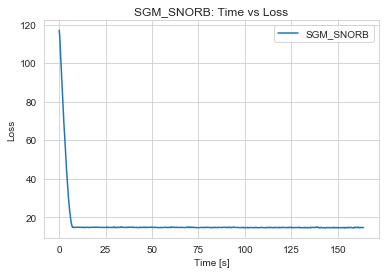

In [117]:
plot('sgm_snorb', loss_sgm_norb, time_sgm_norb)

In [119]:
#does the minimum point respect the bound on the domain?
np.linalg.norm(W_sgm_norb, ord='nuc')

4.901889409742844

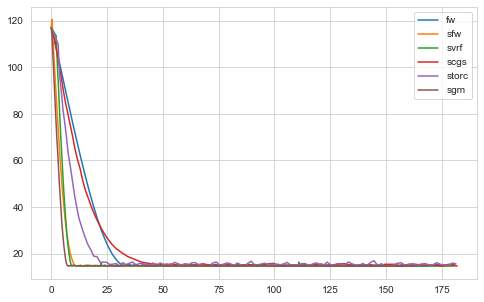

In [120]:
plt.figure(figsize=(8,5))
plt.plot(time_fw_norb, loss_fw_norb, label='fw')
plt.plot(time_sfw_norb, loss_sfw_norb, label='sfw')
plt.plot(time_svrf_norb, loss_svrf_norb, label='svrf')
plt.plot(time_scgs_norb, loss_scgs_norb, label='scgs')
plt.plot(time_storc_norb, loss_storc_norb, label='storc')
plt.plot(time_sgm_norb, loss_sgm_norb, label='sgm')
plt.legend()
plt.show()

## SVRG

In [121]:
loss_svrg_norb, time_svrg_norb, W_svrg_norb = svrg(W = weights_initial.copy(), X = features_norb, y = classes_norb, lr=0.00001
                                    , step_width=sw, maxit = 1000, time_to_run=t, batch_size=100, s=0.5, epochs=50)

Iteration: 1;  Time Elapsed: 0;  Loss: 117.0333578445606
Iteration: 1;  Time Elapsed: 1.7752816677093506;  Loss: 113.46778970912003
Iteration: 2;  Time Elapsed: 1.8949611186981201;  Loss: 109.90718375231998
Iteration: 3;  Time Elapsed: 2.0166358947753906;  Loss: 106.35267519145836
Iteration: 4;  Time Elapsed: 2.170225143432617;  Loss: 102.8047514780048
Iteration: 5;  Time Elapsed: 2.300875663757324;  Loss: 99.26567442230255
Iteration: 6;  Time Elapsed: 2.52431321144104;  Loss: 95.73731182082533
Iteration: 7;  Time Elapsed: 2.706127405166626;  Loss: 92.23337840162586
Iteration: 8;  Time Elapsed: 2.87371826171875;  Loss: 88.7485089622088
Iteration: 9;  Time Elapsed: 3.0133056640625;  Loss: 85.28496743786195
Iteration: 10;  Time Elapsed: 3.16689395904541;  Loss: 81.84474554790626
Iteration: 11;  Time Elapsed: 3.345416307449341;  Loss: 78.46597859929699
Iteration: 12;  Time Elapsed: 3.5239877700805664;  Loss: 75.11130458242494
Iteration: 13;  Time Elapsed: 3.665607213973999;  Loss: 71.7700

Iteration: 111;  Time Elapsed: 20.04440402984619;  Loss: 14.69965384575466
Iteration: 112;  Time Elapsed: 20.16408371925354;  Loss: 14.683071089107495
Iteration: 113;  Time Elapsed: 20.289747953414917;  Loss: 14.715343902553125
Iteration: 114;  Time Elapsed: 20.441343069076538;  Loss: 14.681038437653601
Iteration: 115;  Time Elapsed: 20.589945077896118;  Loss: 14.693534327916245
Iteration: 116;  Time Elapsed: 20.72258973121643;  Loss: 14.693092180045129
Iteration: 117;  Time Elapsed: 20.85124635696411;  Loss: 14.699504766303221
Iteration: 118;  Time Elapsed: 21.060117721557617;  Loss: 14.688313073984197
Iteration: 119;  Time Elapsed: 21.194808959960938;  Loss: 14.709821273460891
Iteration: 120;  Time Elapsed: 21.33241868019104;  Loss: 14.696428227404684
Iteration: 121;  Time Elapsed: 21.46403431892395;  Loss: 14.708934305485656
Iteration: 122;  Time Elapsed: 21.63158369064331;  Loss: 14.693749657044277
Iteration: 123;  Time Elapsed: 21.750266313552856;  Loss: 14.697623747721266
Iterati

Iteration: 219;  Time Elapsed: 40.63079476356506;  Loss: 14.673703735628191
Iteration: 220;  Time Elapsed: 40.772416830062866;  Loss: 14.66908054303535
Iteration: 221;  Time Elapsed: 40.941964864730835;  Loss: 14.673294752974458
Iteration: 222;  Time Elapsed: 41.116496562957764;  Loss: 14.668209913790019
Iteration: 223;  Time Elapsed: 41.335909366607666;  Loss: 14.678347969119267
Iteration: 224;  Time Elapsed: 41.500468730926514;  Loss: 14.676025458424455
Iteration: 225;  Time Elapsed: 41.670016050338745;  Loss: 14.677646494344678
Iteration: 226;  Time Elapsed: 41.81961631774902;  Loss: 14.670764536701528
Iteration: 227;  Time Elapsed: 41.97420072555542;  Loss: 14.680150792596022
Iteration: 228;  Time Elapsed: 42.1257963180542;  Loss: 14.672636348935109
Iteration: 229;  Time Elapsed: 42.28836178779602;  Loss: 14.670173394718637
Iteration: 230;  Time Elapsed: 42.43197751045227;  Loss: 14.66773632015475
Iteration: 231;  Time Elapsed: 42.6214702129364;  Loss: 14.67474581388892
Iteration: 

Iteration: 328;  Time Elapsed: 63.27104616165161;  Loss: 14.65547896487696
Iteration: 329;  Time Elapsed: 63.429619550704956;  Loss: 14.654686137887934
Iteration: 330;  Time Elapsed: 63.58719992637634;  Loss: 14.654714027411725
Iteration: 331;  Time Elapsed: 63.74378204345703;  Loss: 14.654254357328767
Iteration: 332;  Time Elapsed: 63.90835189819336;  Loss: 14.654113068205488
Iteration: 333;  Time Elapsed: 64.06593132019043;  Loss: 14.654227824477966
Iteration: 334;  Time Elapsed: 64.22849607467651;  Loss: 14.654806809558467
Iteration: 335;  Time Elapsed: 64.37909269332886;  Loss: 14.655036188858622
Iteration: 336;  Time Elapsed: 64.54666447639465;  Loss: 14.654471031134074
Iteration: 337;  Time Elapsed: 64.713219165802;  Loss: 14.654360720877188
Iteration: 338;  Time Elapsed: 64.9007580280304;  Loss: 14.654189870229342
Iteration: 339;  Time Elapsed: 65.04533290863037;  Loss: 14.653438085598532
Iteration: 340;  Time Elapsed: 65.19692802429199;  Loss: 14.653749831757976
Iteration: 341;

Iteration: 437;  Time Elapsed: 84.95706582069397;  Loss: 14.639251369673001
Iteration: 438;  Time Elapsed: 85.10965776443481;  Loss: 14.640385344541492
Iteration: 439;  Time Elapsed: 85.27820682525635;  Loss: 14.639057046135608
Iteration: 440;  Time Elapsed: 85.41883039474487;  Loss: 14.641266129207956
Iteration: 441;  Time Elapsed: 85.57341742515564;  Loss: 14.639083567443466
Iteration: 442;  Time Elapsed: 85.74097013473511;  Loss: 14.641210354830918
Iteration: 443;  Time Elapsed: 85.9424319267273;  Loss: 14.63865091618848
Iteration: 444;  Time Elapsed: 86.20074415206909;  Loss: 14.64026422378106
Iteration: 445;  Time Elapsed: 86.50845956802368;  Loss: 14.639277051039176
Iteration: 446;  Time Elapsed: 86.79669046401978;  Loss: 14.640067572161044
Iteration: 447;  Time Elapsed: 86.9911675453186;  Loss: 14.638368924348136
Iteration: 448;  Time Elapsed: 87.2454879283905;  Loss: 14.638263726644256
Iteration: 449;  Time Elapsed: 87.4848473072052;  Loss: 14.63895808290925
Iteration: 450;  Ti

Iteration: 546;  Time Elapsed: 107.92764234542847;  Loss: 14.625827547367082
Iteration: 547;  Time Elapsed: 108.07725858688354;  Loss: 14.625003549149186
Iteration: 548;  Time Elapsed: 108.22386693954468;  Loss: 14.625691491491859
Iteration: 549;  Time Elapsed: 108.37446427345276;  Loss: 14.624097600936441
Iteration: 550;  Time Elapsed: 108.548996925354;  Loss: 14.626173244459634
Iteration: 551;  Time Elapsed: 110.23068809509277;  Loss: 14.624858626821304
Iteration: 552;  Time Elapsed: 110.39624524116516;  Loss: 14.627218321040687
Iteration: 553;  Time Elapsed: 110.55183267593384;  Loss: 14.62392996494659
Iteration: 554;  Time Elapsed: 110.6884663105011;  Loss: 14.625970412221777
Iteration: 555;  Time Elapsed: 110.84105563163757;  Loss: 14.624031505024806
Iteration: 556;  Time Elapsed: 110.98267889022827;  Loss: 14.623436128851026
Iteration: 557;  Time Elapsed: 111.1442883014679;  Loss: 14.622096966499175
Iteration: 558;  Time Elapsed: 111.2968373298645;  Loss: 14.623110918432708
Itera

Iteration: 653;  Time Elapsed: 130.02012991905212;  Loss: 14.611543933073547
Iteration: 654;  Time Elapsed: 130.17172193527222;  Loss: 14.609319817743968
Iteration: 655;  Time Elapsed: 130.35324120521545;  Loss: 14.610275007712382
Iteration: 656;  Time Elapsed: 130.50383353233337;  Loss: 14.60579880488496
Iteration: 657;  Time Elapsed: 130.7008204460144;  Loss: 14.61336428337263
Iteration: 658;  Time Elapsed: 130.85241603851318;  Loss: 14.609222984767348
Iteration: 659;  Time Elapsed: 131.01797223091125;  Loss: 14.612349885740198
Iteration: 660;  Time Elapsed: 131.17056488990784;  Loss: 14.606299317686176
Iteration: 661;  Time Elapsed: 131.3401117324829;  Loss: 14.612588068718244
Iteration: 662;  Time Elapsed: 131.50168108940125;  Loss: 14.60851174797934
Iteration: 663;  Time Elapsed: 131.67022848129272;  Loss: 14.612736929332717
Iteration: 664;  Time Elapsed: 131.82980275154114;  Loss: 14.608893949314147
Iteration: 665;  Time Elapsed: 131.9988625049591;  Loss: 14.617739246136637
Itera

Iteration: 761;  Time Elapsed: 150.97151613235474;  Loss: 14.608066619919358
Iteration: 762;  Time Elapsed: 151.12709879875183;  Loss: 14.5975548749493
Iteration: 763;  Time Elapsed: 151.28767085075378;  Loss: 14.600433932694616
Iteration: 764;  Time Elapsed: 151.43627262115479;  Loss: 14.598806990586976
Iteration: 765;  Time Elapsed: 151.59185600280762;  Loss: 14.604548265529335
Iteration: 766;  Time Elapsed: 151.7394835948944;  Loss: 14.59283129567799
Iteration: 767;  Time Elapsed: 151.90404391288757;  Loss: 14.59972926967947
Iteration: 768;  Time Elapsed: 152.05264735221863;  Loss: 14.591318773117262
Iteration: 769;  Time Elapsed: 152.22219252586365;  Loss: 14.600321862487132
Iteration: 770;  Time Elapsed: 152.36880016326904;  Loss: 14.595936125810274
Iteration: 771;  Time Elapsed: 152.51540732383728;  Loss: 14.59794934970099
Iteration: 772;  Time Elapsed: 152.6600217819214;  Loss: 14.604481226223278
Iteration: 773;  Time Elapsed: 152.82956743240356;  Loss: 14.594423623486755
Iterat

Iteration: 869;  Time Elapsed: 171.52238631248474;  Loss: 14.58048603992877
Iteration: 870;  Time Elapsed: 171.67098903656006;  Loss: 14.578498176273639
Iteration: 871;  Time Elapsed: 171.83056211471558;  Loss: 14.583134965243651
Iteration: 872;  Time Elapsed: 171.9741780757904;  Loss: 14.587811315239698
Iteration: 873;  Time Elapsed: 172.15170097351074;  Loss: 14.581506159992166
Iteration: 874;  Time Elapsed: 172.3013014793396;  Loss: 14.581315984299122
Iteration: 875;  Time Elapsed: 172.4957790374756;  Loss: 14.57877542828351
Iteration: 876;  Time Elapsed: 172.64238739013672;  Loss: 14.578559274047578
Iteration: 877;  Time Elapsed: 172.7989685535431;  Loss: 14.576033852236847
Iteration: 878;  Time Elapsed: 172.9435818195343;  Loss: 14.578238631262845
Iteration: 879;  Time Elapsed: 173.10714387893677;  Loss: 14.576403604405842
Iteration: 880;  Time Elapsed: 173.25973677635193;  Loss: 14.578919709005552
Iteration: 881;  Time Elapsed: 173.41831254959106;  Loss: 14.575253495599906
Iterat

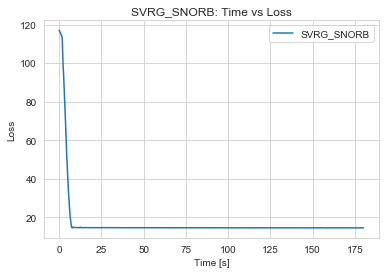

In [122]:
plot('svrg_snorb', loss_svrg_norb, time_svrg_norb)

In [124]:
#does the minimum point respect the bound on the domain?
np.linalg.norm(W_svrg_norb, ord='nuc')

4.89846241965603

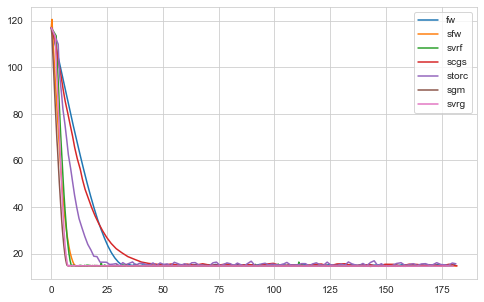

In [125]:
plt.figure(figsize=(8,5))
plt.plot(time_fw_norb, loss_fw_norb, label='fw')
plt.plot(time_sfw_norb, loss_sfw_norb, label='sfw')
plt.plot(time_svrf_norb, loss_svrf_norb, label='svrf')
plt.plot(time_scgs_norb, loss_scgs_norb, label='scgs')
plt.plot(time_storc_norb, loss_storc_norb, label='storc')
plt.plot(time_sgm_norb, loss_sgm_norb, label='sgm')
plt.plot(time_svrg_norb, loss_svrg_norb, label='svrg')
plt.legend()
plt.show()

## Recap

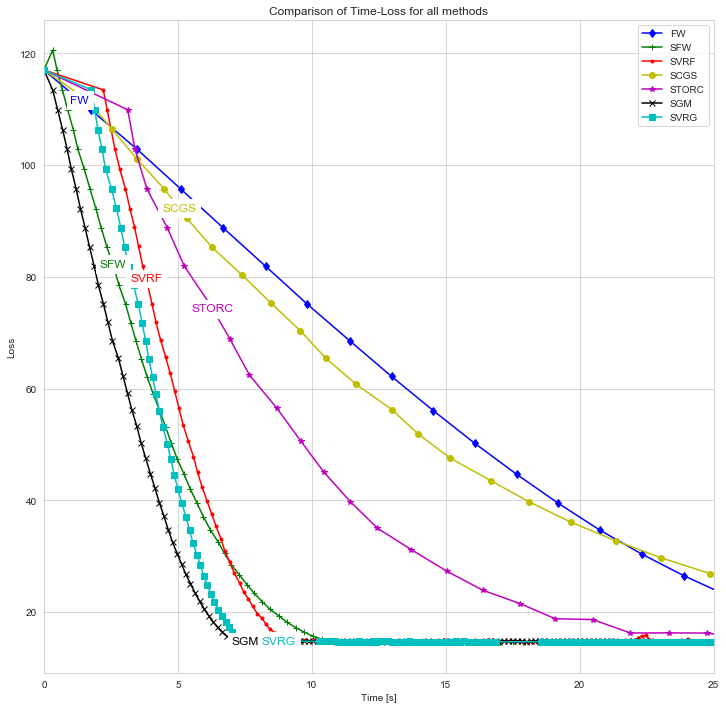

In [126]:
plot_all(['FW', 'SFW','SVRF','SCGS','STORC','SGM','SVRG'], 
         [loss_fw_norb, loss_sfw_norb, loss_svrf_norb, loss_scgs_norb, loss_storc_norb, loss_sgm_norb, loss_svrg_norb], 
         [time_fw_norb, time_sfw_norb, time_svrf_norb, time_scgs_norb, time_storc_norb, time_sgm_norb, time_svrg_norb],
         xlimit=(0,25), name='_smallNORB')